In [101]:
# from https://www.kaggle.com/code/mrankitgupta/spotify-data-analysis-using-python
# and from # https://github.com/enjuichang/PracticalDataScience-ENCA
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import json
import pandas as pd
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


# setting up the credentials
client_id = "2ca89022ac6348b99eb6e5cb99583158"
client_secret = "4dd5feb53234451f9952db292972a656"
auth_url = 'https://accounts.spotify.com/api/token'

os.environ['SPOTIPY_CLIENT_ID'] = client_id
os.environ['SPOTIPY_CLIENT_SECRET'] = client_secret
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://localhost:1410/'

data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
    'scope': 'user-top-read'
}

# get access token
auth_response = requests.post(auth_url, data=data)
access_token = auth_response.json().get('access_token')

# access api
base_url = 'https://api.spotify.com/v1/'

headers = {
    'Authorization': 'Bearer {}'.format(access_token)
}

In [102]:
# Request top tracks data and create top tracks dataframe

# set up authorisation for user data
scope = "user-top-read"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

#https://www.linkedin.com/pulse/analyse-your-spotify-data-python-spotipy-shai-nisan-ph-d-/
user_top_tracks = sp.current_user_top_tracks(limit=50)
user_top_tracks2 = sp.current_user_top_tracks(limit=50, offset = 50)

# create lists for future iteration
top_track_ids = []
top_track_titles = []

for i in user_top_tracks['items']:
    top_track_ids.append(i['id'])
    top_track_titles.append(i['name'])
#for i in user_top_tracks2['items']:
#    top_track_ids.append(i['id'])
#    top_track_titles.append(i['name'])

#create a dataframe
top_features = sp.audio_features(top_track_ids)
top_features_df = pd.DataFrame(data=top_features, columns=top_features[0].keys())
top_features_df.drop(columns=["type", "id","uri","track_href", "analysis_url", "time_signature"], inplace=True)

top_features_df.head()



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.399,0.7610,9,-6.318,1,0.0334,0.000105,0.0456,0.0757,0.2430,140.084,304907
1,0.252,0.1880,1,-11.648,1,0.0456,0.329000,0.1210,0.1000,0.0302,86.997,113773
2,0.404,0.4070,5,-11.843,1,0.0299,0.492000,0.0338,0.3910,0.0848,106.547,189293
3,0.430,0.2560,2,-15.737,1,0.0607,0.161000,0.8520,0.1470,0.2080,96.704,330905
4,0.213,0.0695,11,-14.832,1,0.0409,0.018500,0.9580,0.1240,0.0382,112.192,106213


In [103]:
# Func to store daily mix info, returns dataframe with 'features'
# https://medium.com/codex/decoding-spotify-daily-mix-73f4783037b4

scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

def fetch_daily_mix(id):

    result = sp.playlist(id)

    track_ids = []

    for i in result['tracks']['items']:
        track = i['track']
        track_ids.append(track['id'])

    features = sp.audio_features(track_ids)
    df = pd.DataFrame(data=features, columns=features[0].keys())
    df.drop(columns=["type", "id","uri","track_href", "analysis_url", "time_signature"], inplace=True)

    return df

In [104]:
# Manually input daily mix playlists, as the API doesn't support a call
# Then combine data
# Daily mixes accessed on 9/4/24

#indie Mix
#https://open.spotify.com/playlist/37i9dQZF1EQqkOPvHGajmW?si=fcdcd0544f99465d
indie_mix = fetch_daily_mix("https://open.spotify.com/playlist/37i9dQZF1EQqkOPvHGajmW?si=fcdcd0544f99465d")

#dance/electronic mix
#https://open.spotify.com/playlist/37i9dQZF1EQp9BVPsNVof1?si=7137873e4b1547b9
dance_electronic_mix = fetch_daily_mix("https://open.spotify.com/playlist/37i9dQZF1EQp9BVPsNVof1?si=7137873e4b1547b9")

#chill mix
#https://open.spotify.com/playlist/37i9dQZF1EVHGWrwldPRtj?si=0348a4a3a2974cf3
chill_mix = fetch_daily_mix("https://open.spotify.com/playlist/37i9dQZF1EVHGWrwldPRtj?si=0348a4a3a2974cf3")

#upbeat mix
#https://open.spotify.com/playlist/37i9dQZF1EVJHK7Q1TBABQ?si=adf2057ec8184d87
upbeat_mix = fetch_daily_mix("https://open.spotify.com/playlist/37i9dQZF1EVJHK7Q1TBABQ?si=adf2057ec8184d87")

#pop mix
#https://open.spotify.com/playlist/37i9dQZF1EQncLwOalG3K7?si=b1bb9edee4e14a3a
pop_mix = fetch_daily_mix("https://open.spotify.com/playlist/37i9dQZF1EQncLwOalG3K7?si=b1bb9edee4e14a3a")

#folk & acoustic mix
#https://open.spotify.com/playlist/37i9dQZF1EQp62d3Dl7ECY?si=072b53072c9d4a8a
folk_acoustic_mix = fetch_daily_mix("https://open.spotify.com/playlist/37i9dQZF1EQp62d3Dl7ECY?si=072b53072c9d4a8a")

# give the source name for each dataframe
indie_mix['source'] = 'Indie Mix'
dance_electronic_mix['source'] = 'Dance/Elec Mix'
chill_mix['source'] = 'Chill Mix'
upbeat_mix['source'] = 'Upbeat Mix'
pop_mix['source'] = 'Pop Mix'
folk_acoustic_mix['source'] = 'Folk/Acoust Mix'
top_features_df['source'] = 'User Top Tracks'

# merge the dataframes together
spotify_df = pd.concat([top_features_df, indie_mix, dance_electronic_mix, chill_mix, upbeat_mix, pop_mix, folk_acoustic_mix])
# set the sns style for the visualization
sns.set_context('poster')
sns.set_style('dark')


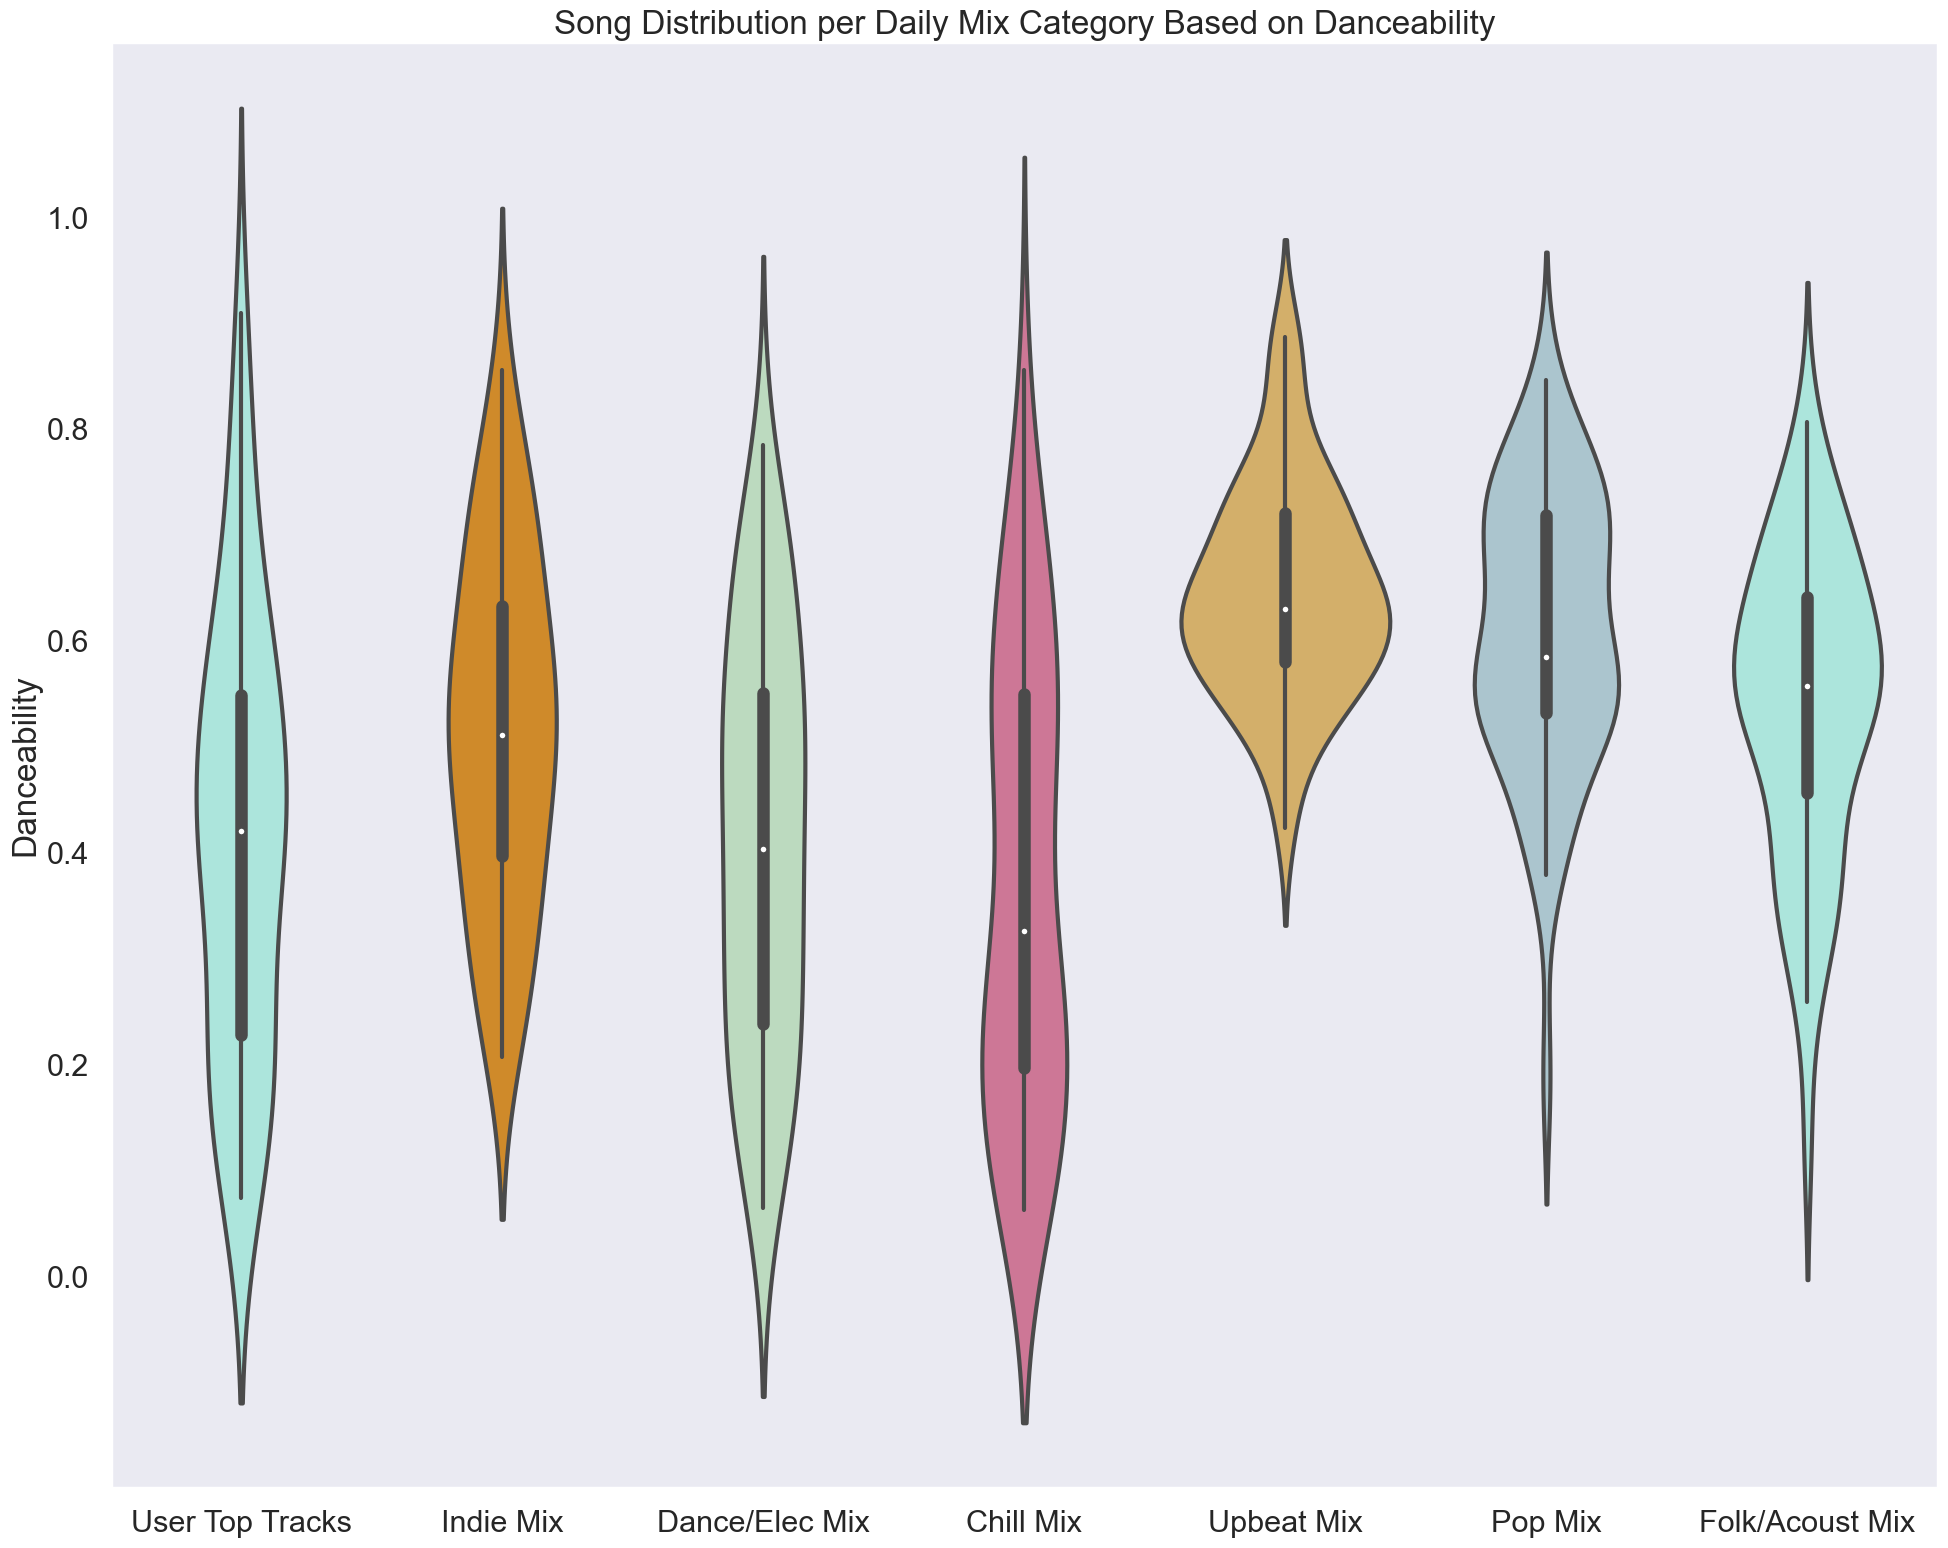

Danceability
Min: 0.0631
Max: 0.91


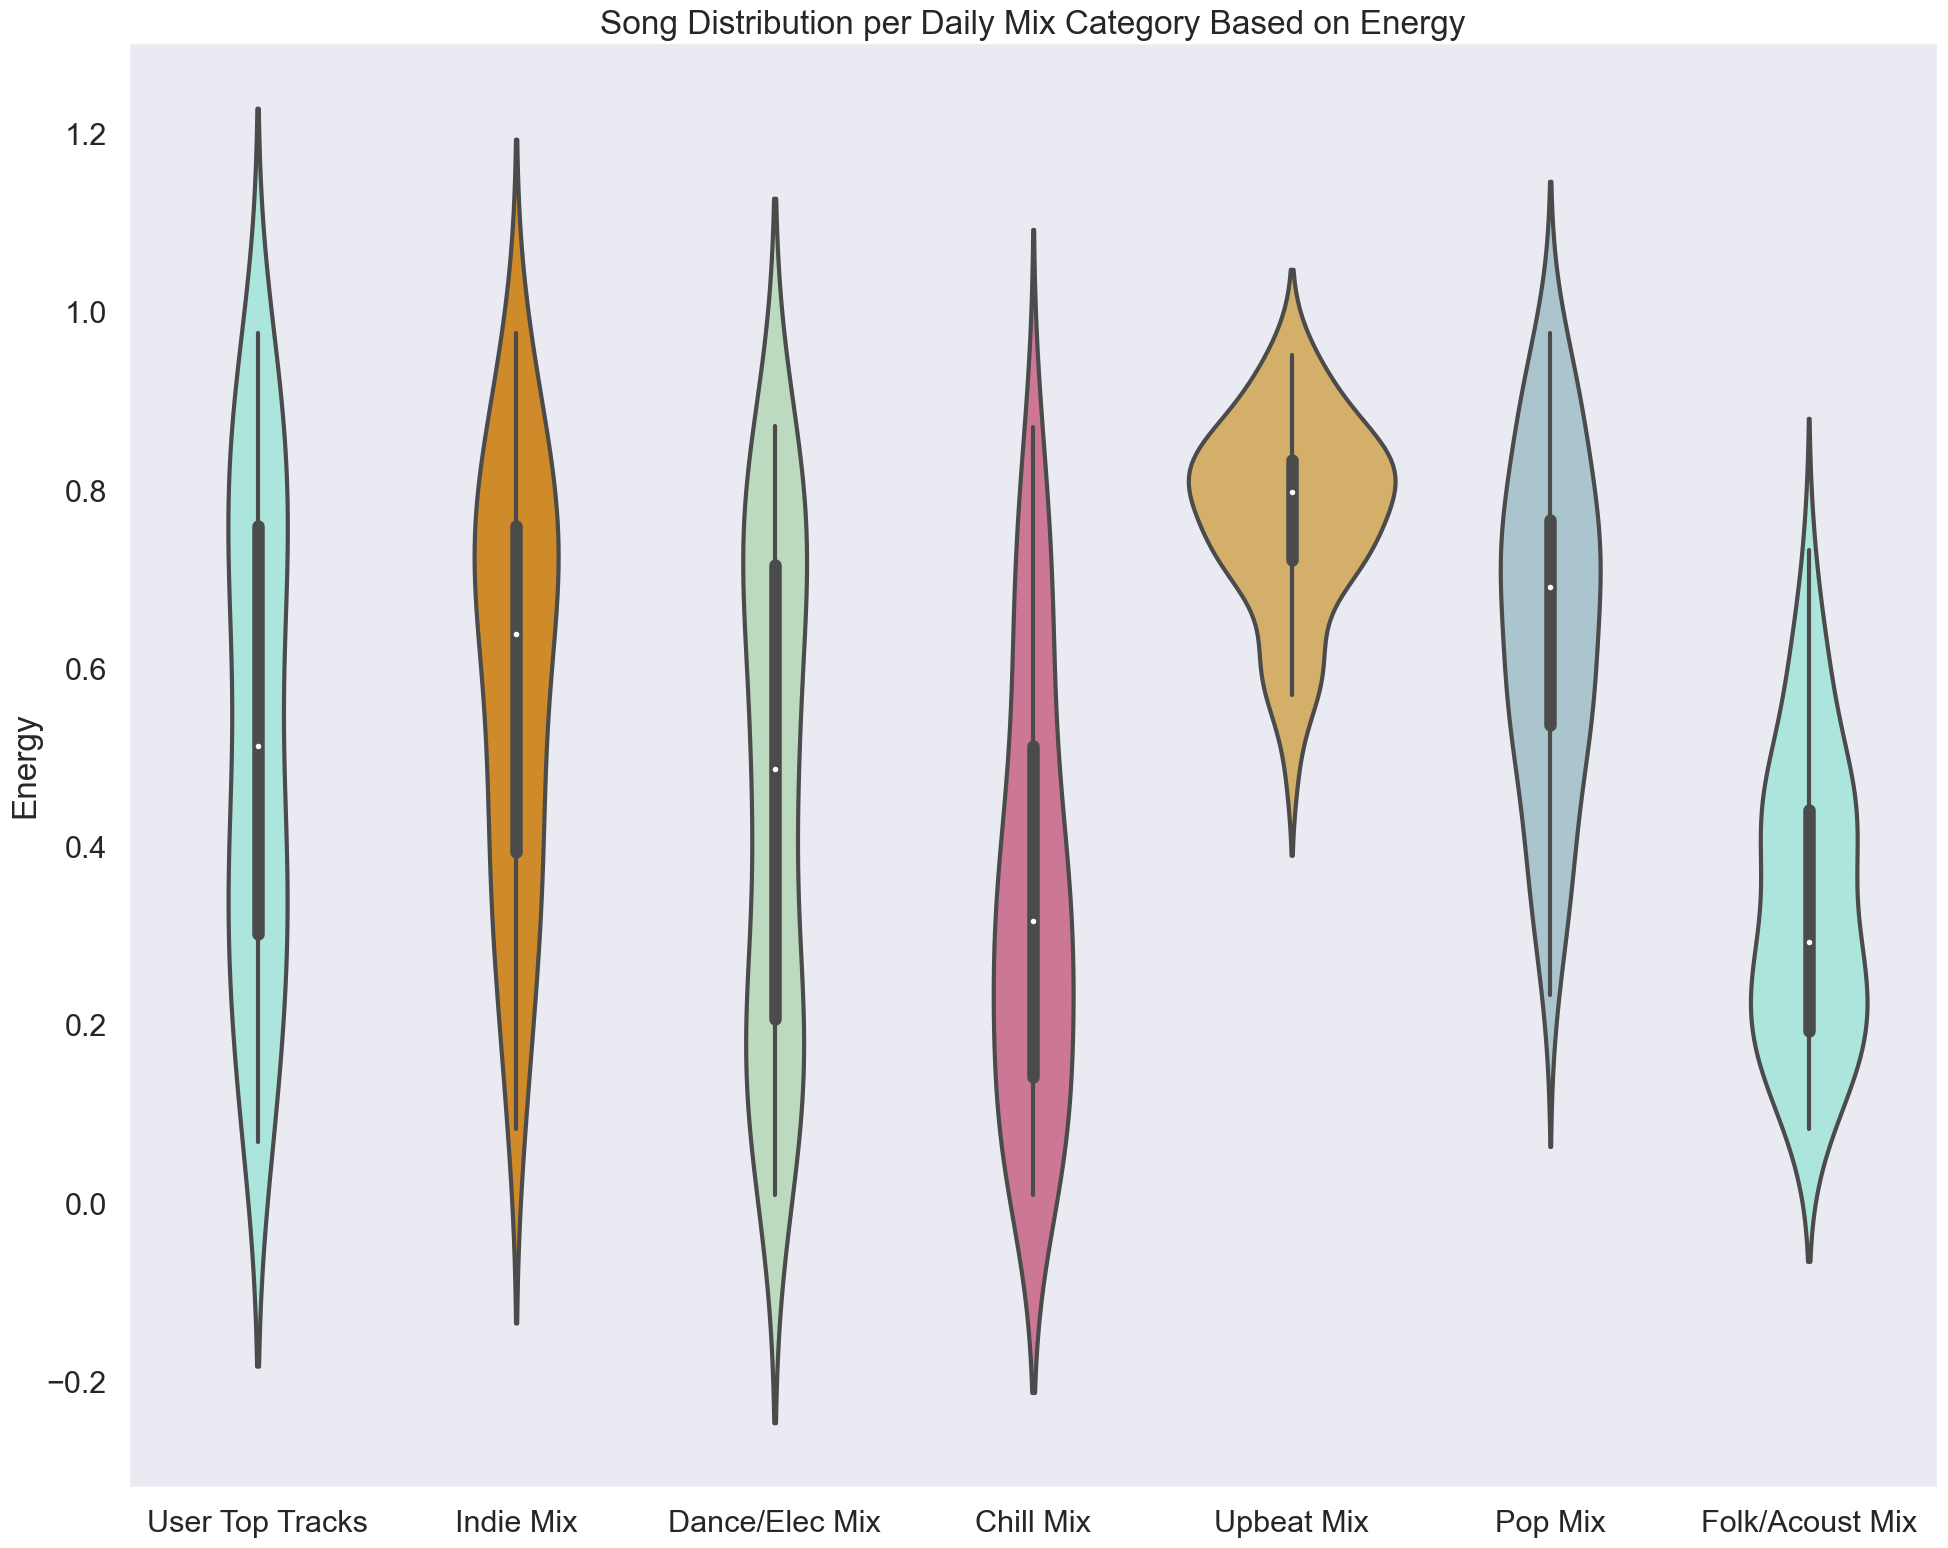

Energy
Min: 0.00995
Max: 0.977


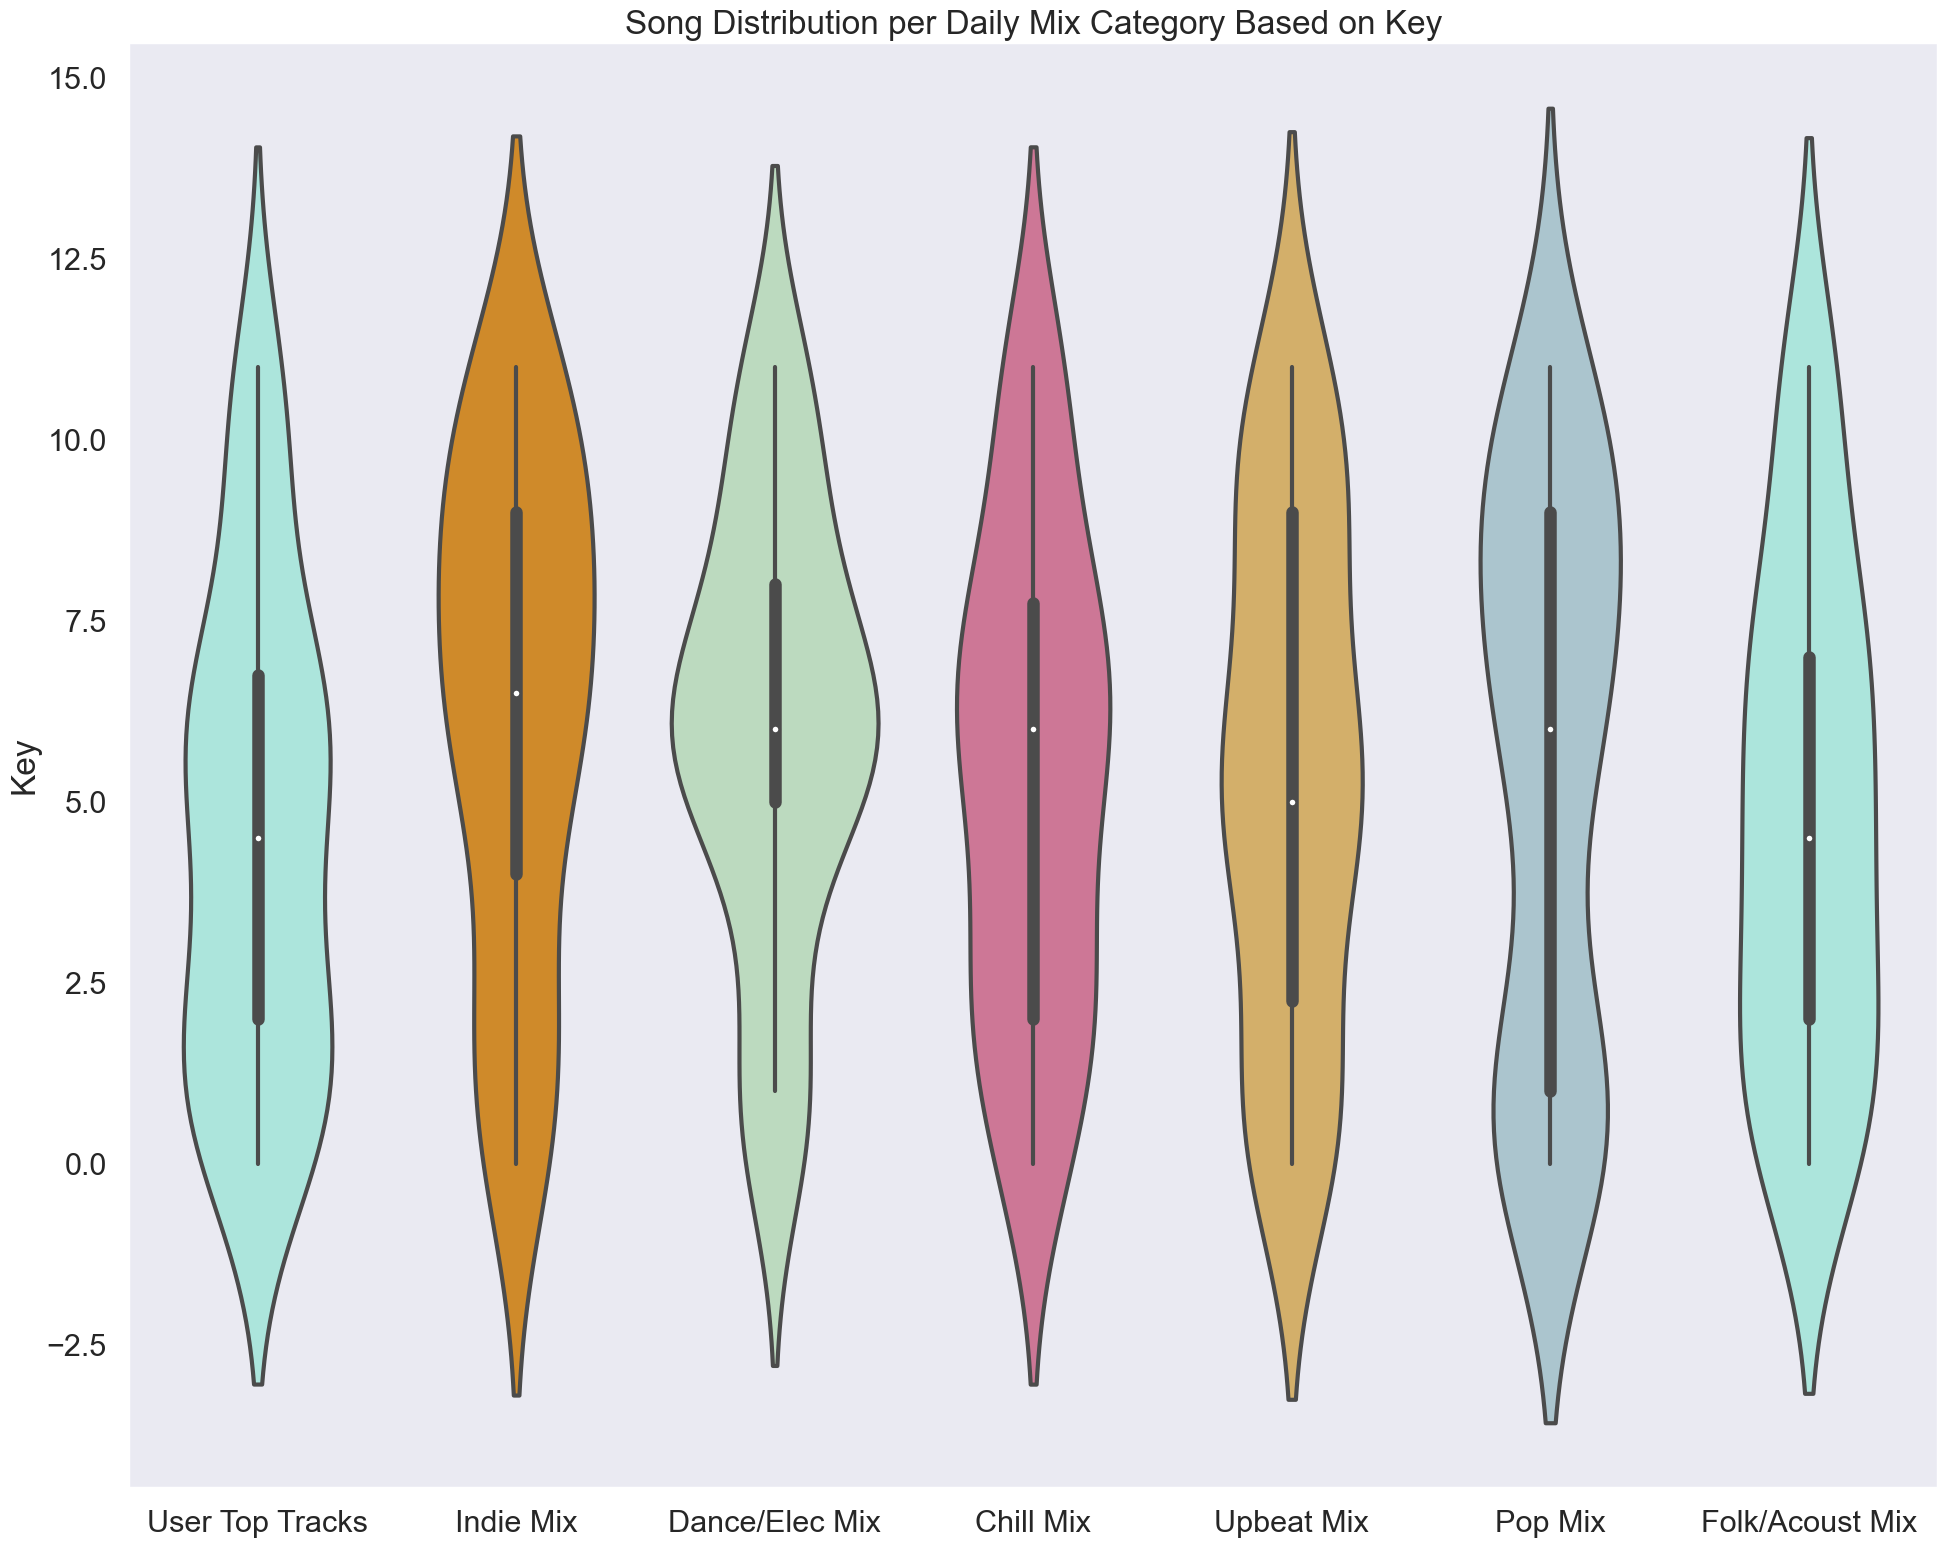

Key
Min: 0
Max: 11


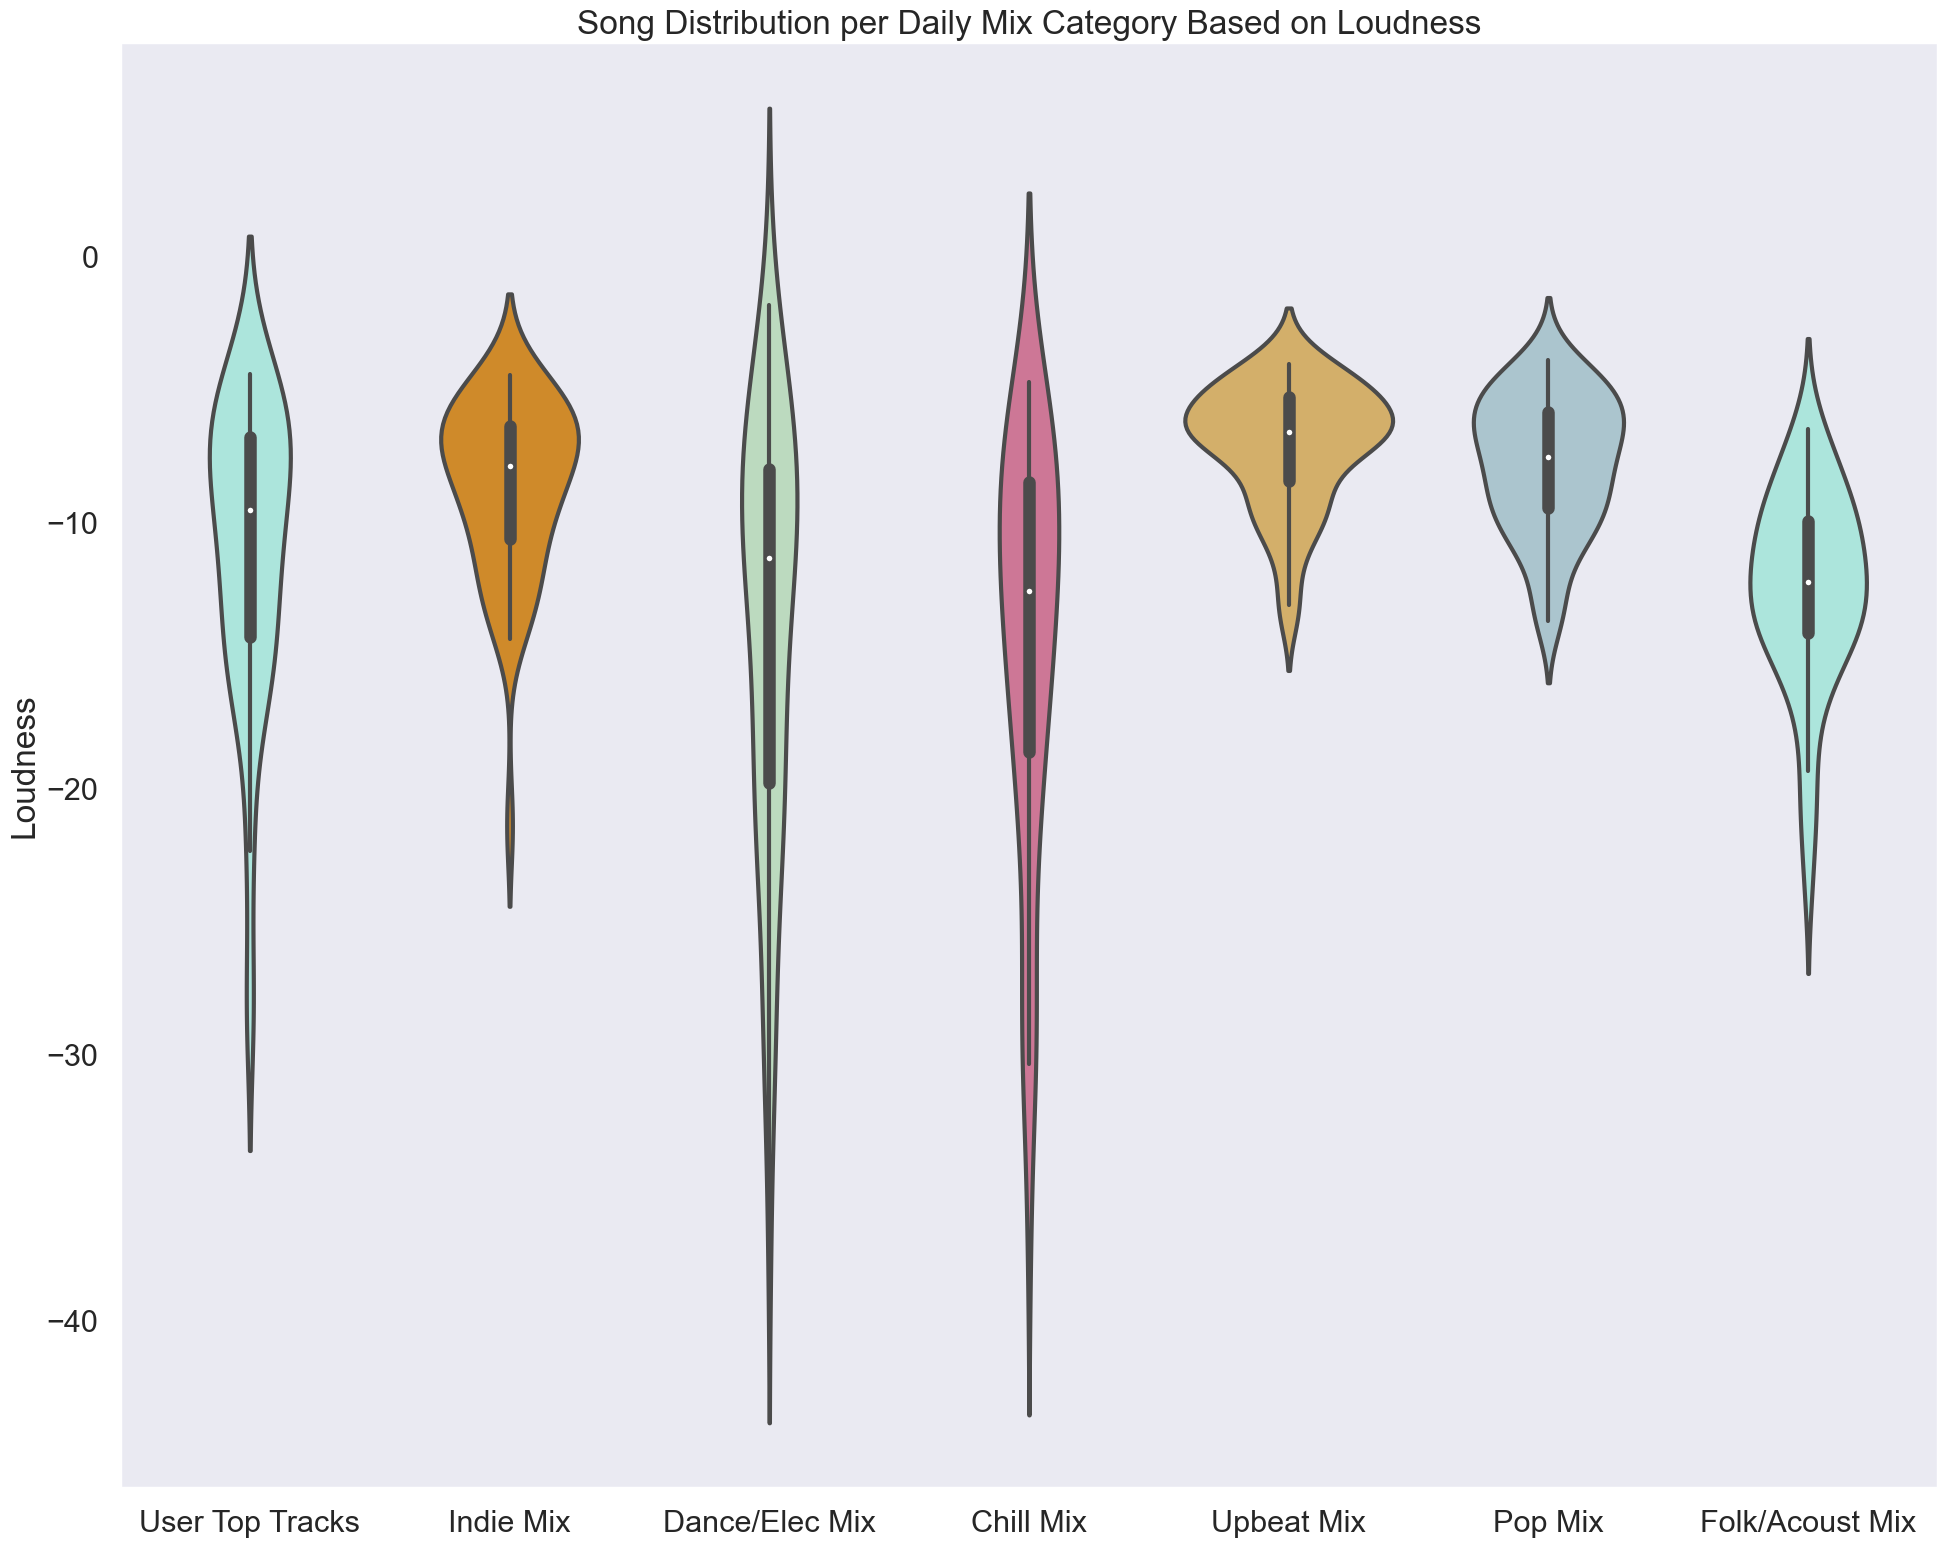

Loudness
Min: -36.423
Max: -1.827


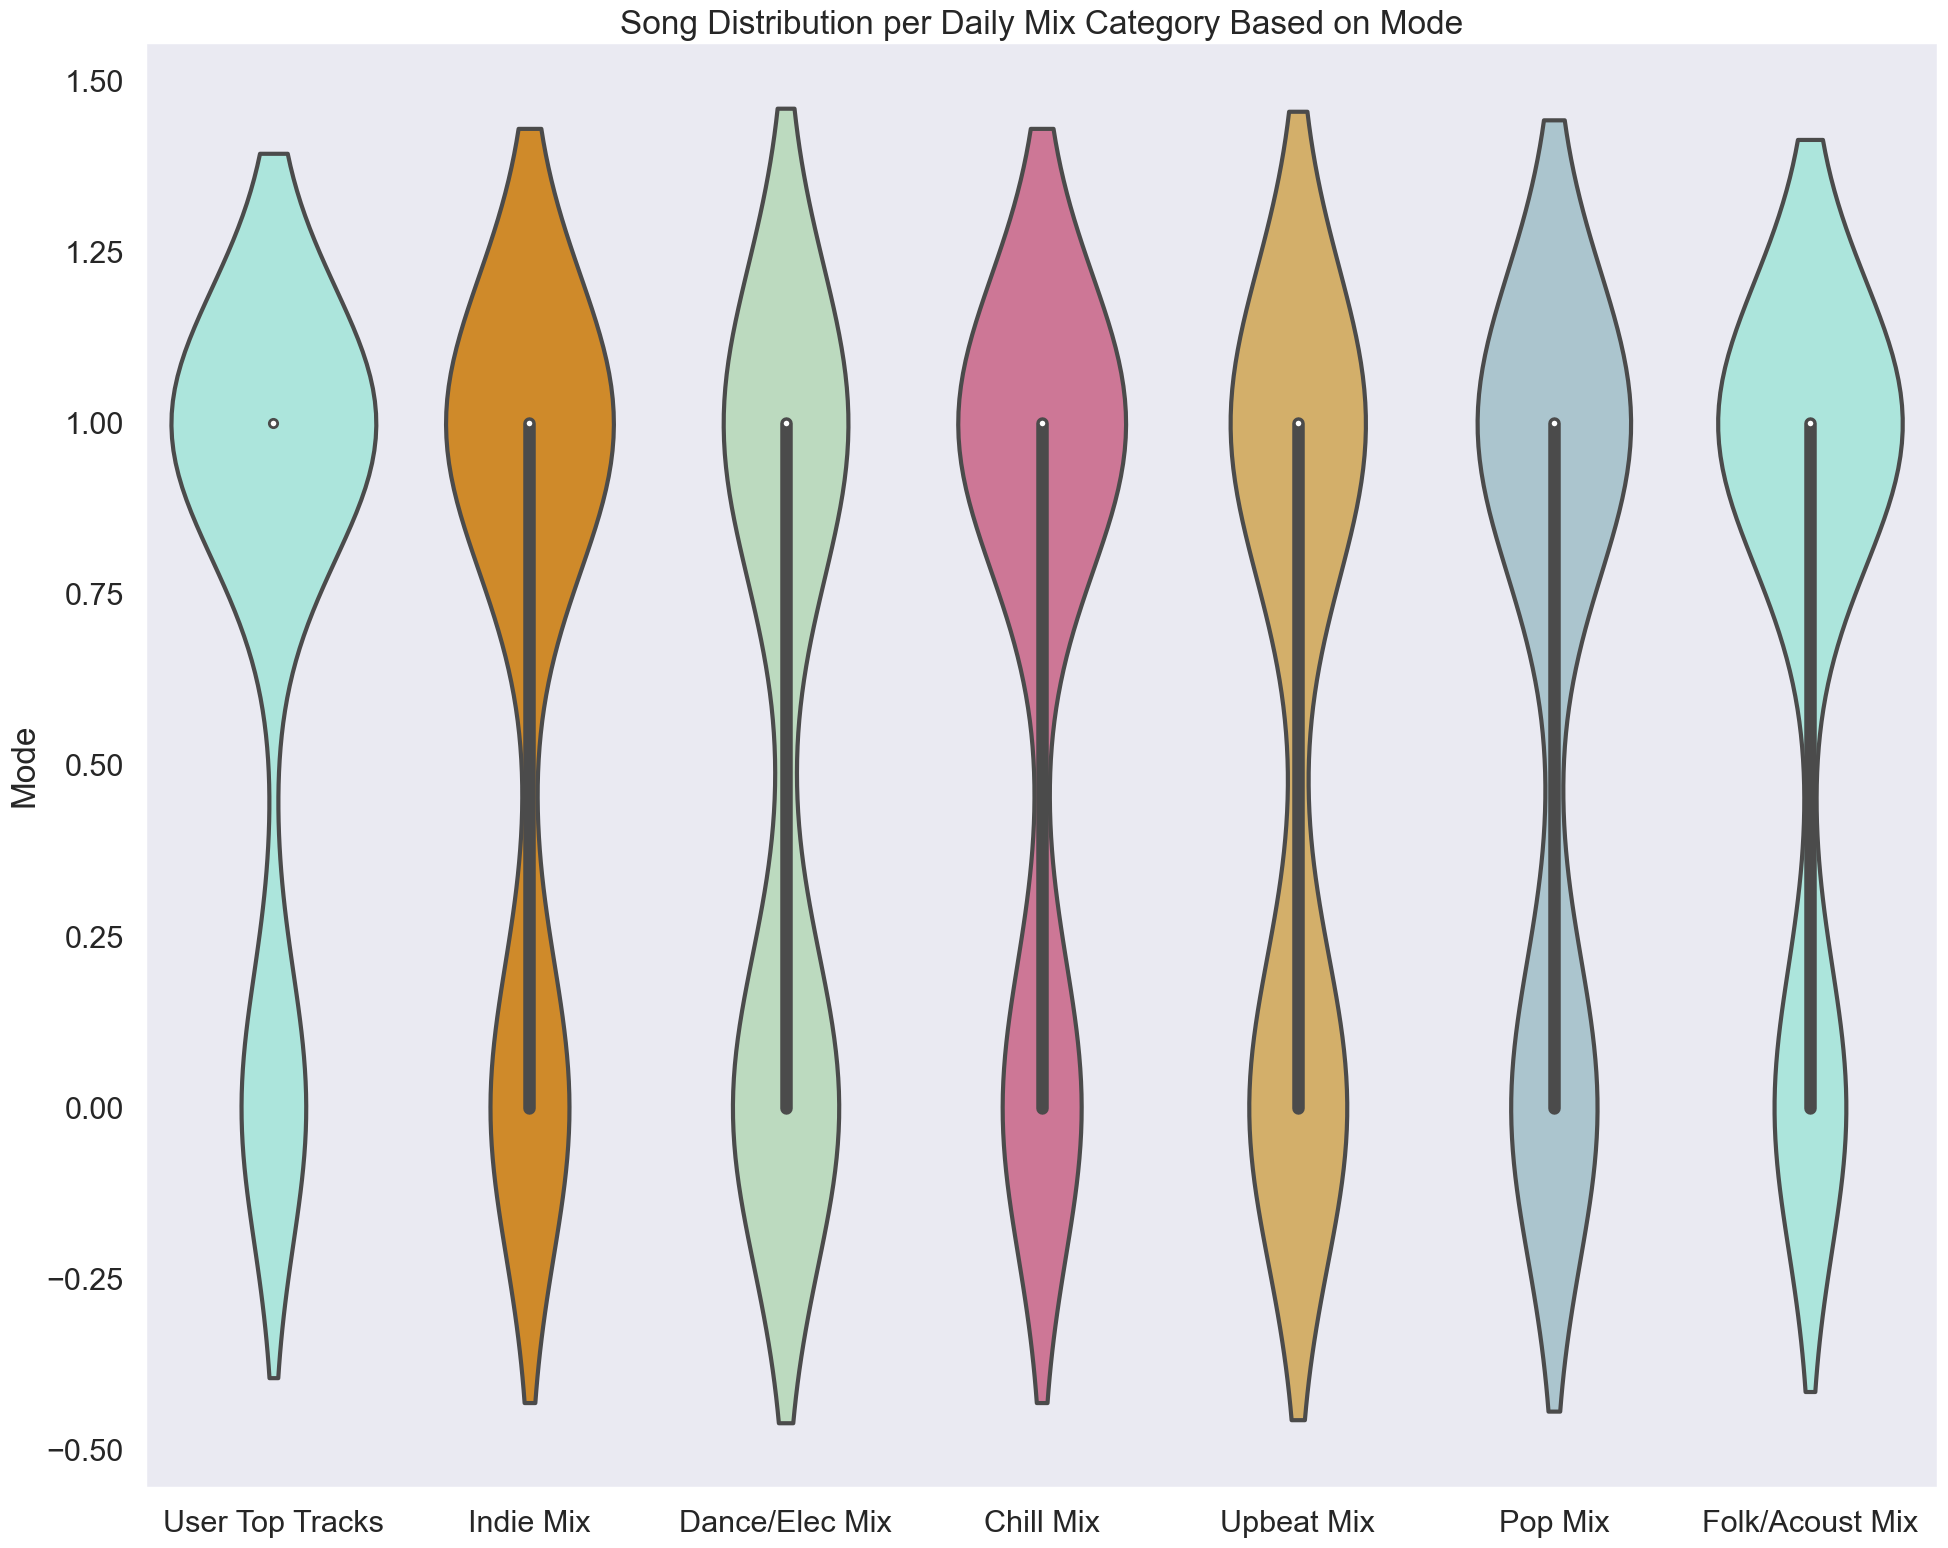

Mode
Min: 0
Max: 1


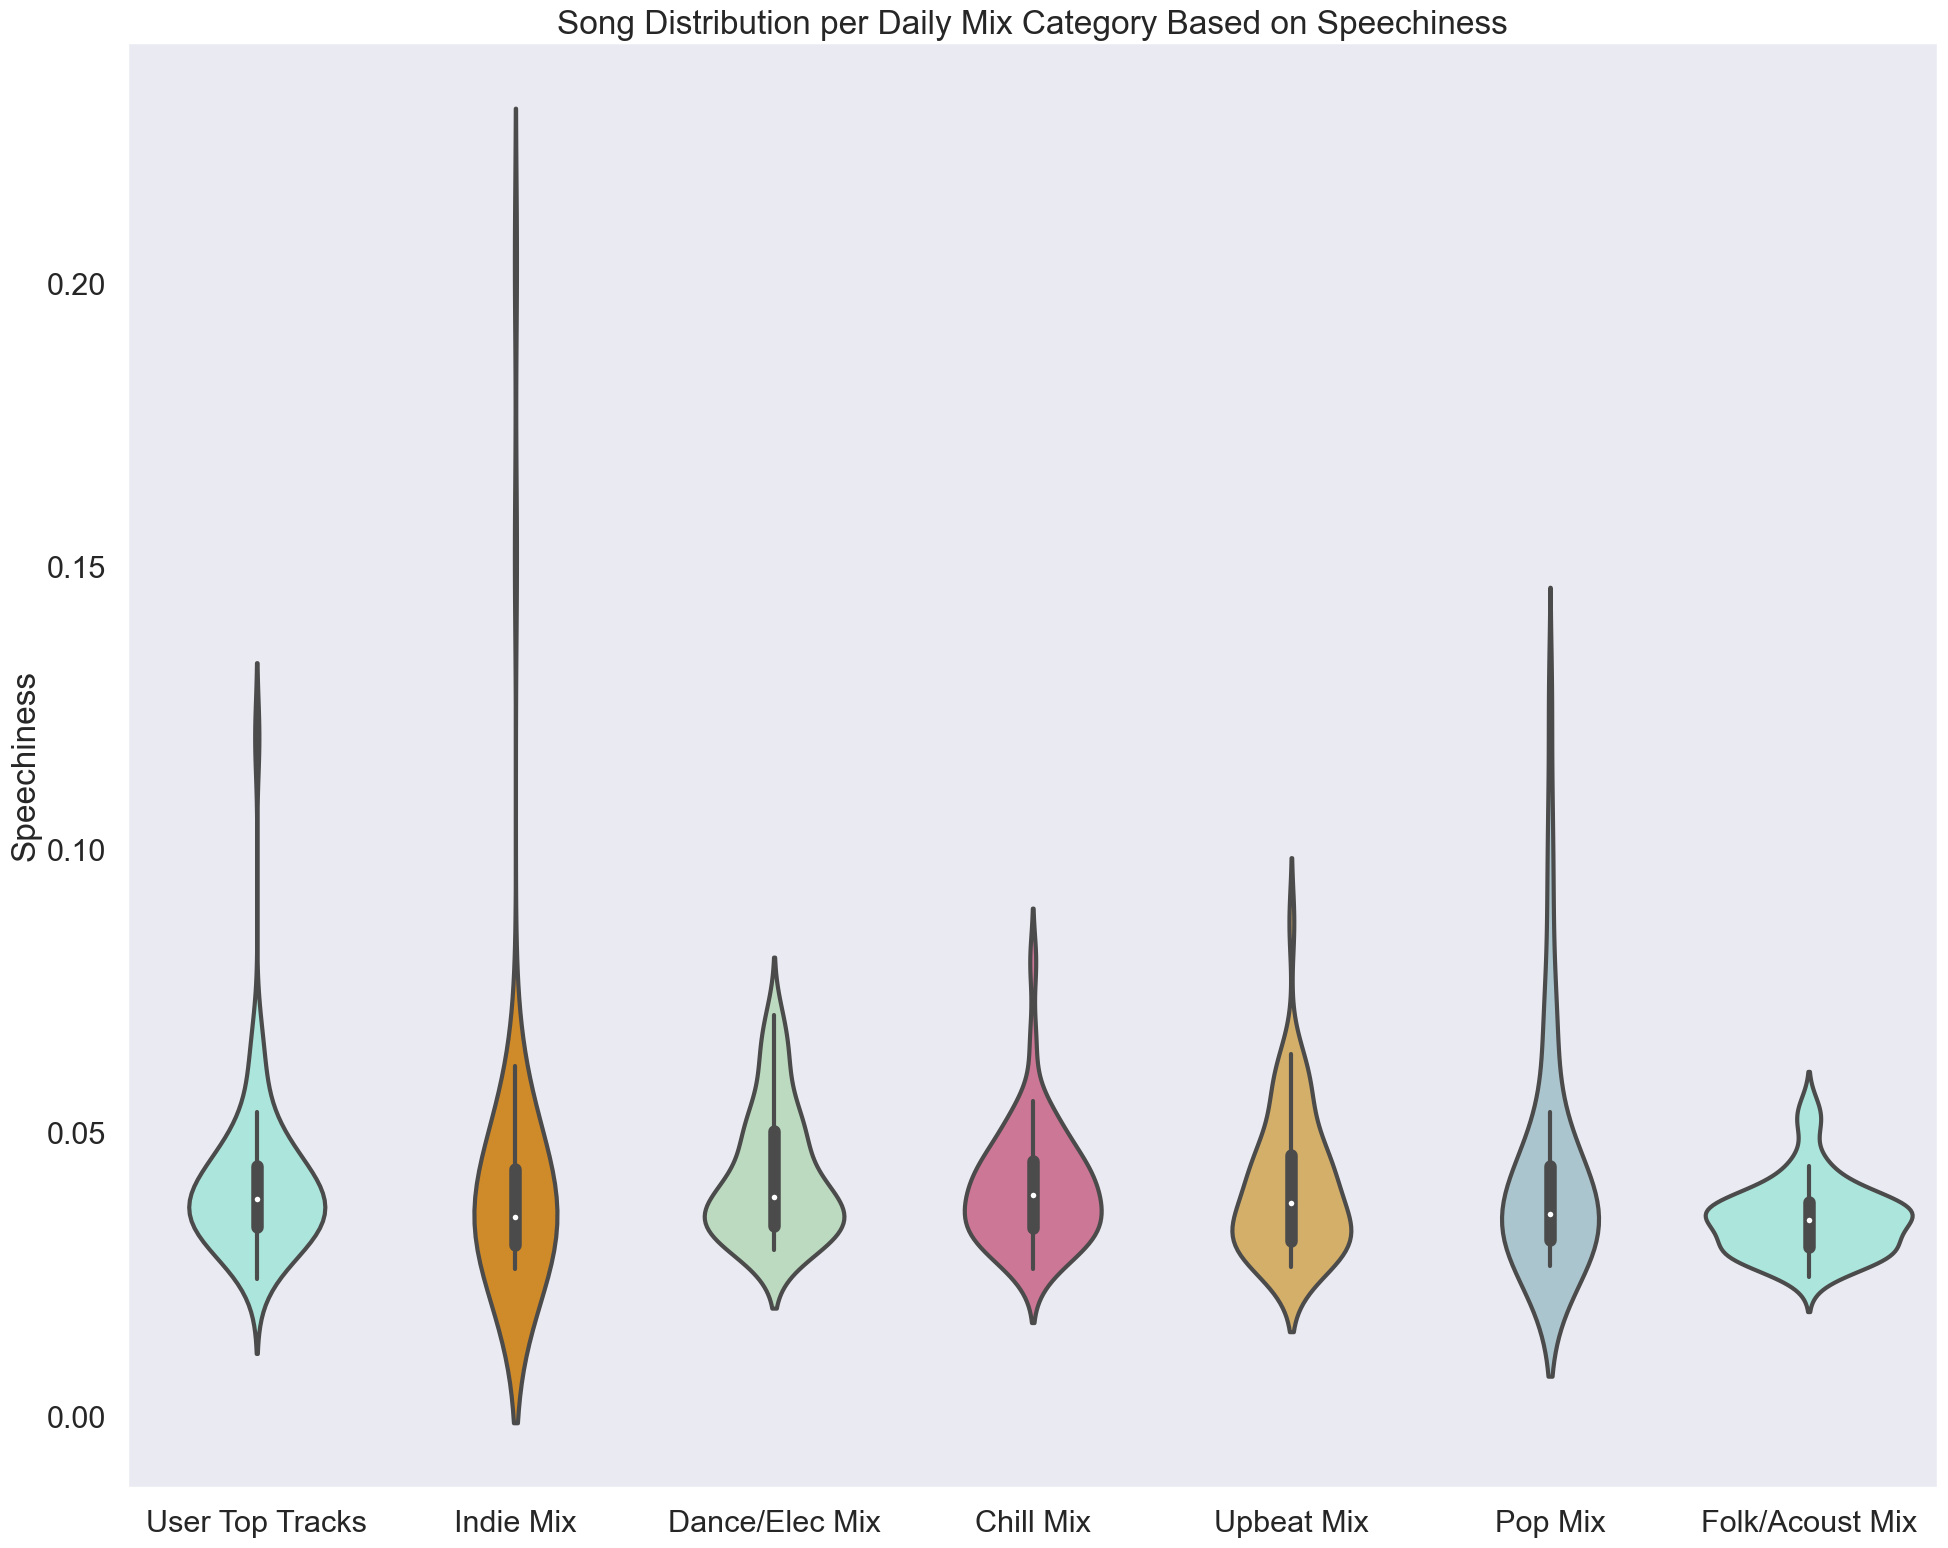

Speechiness
Min: 0.0243
Max: 0.204


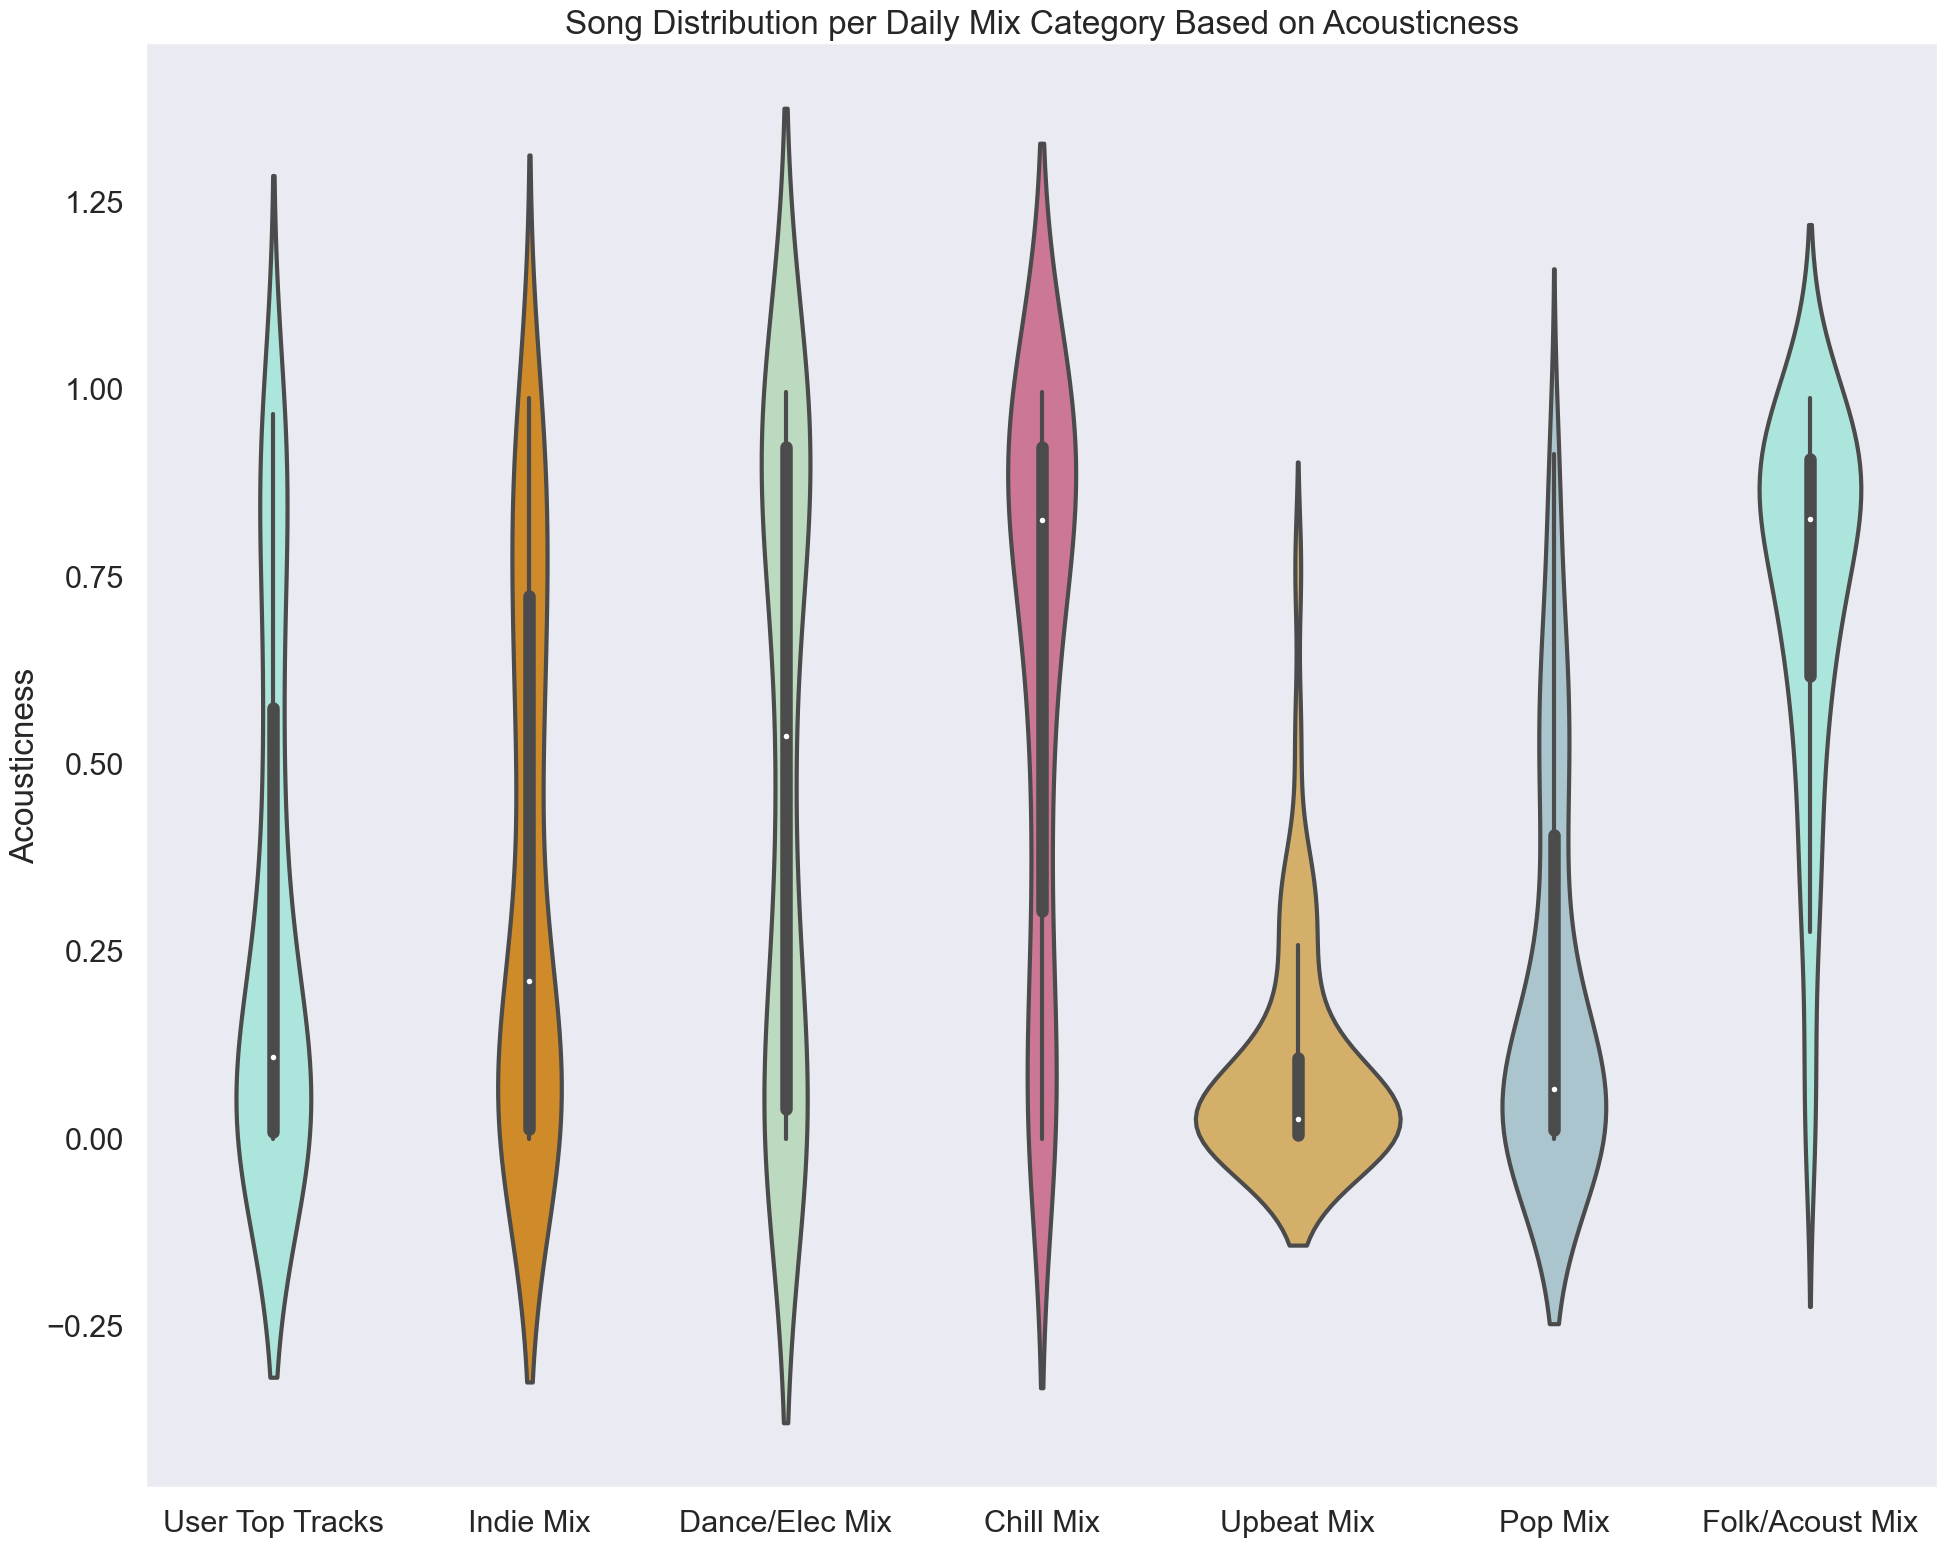

Acousticness
Min: 1.95e-05
Max: 0.996


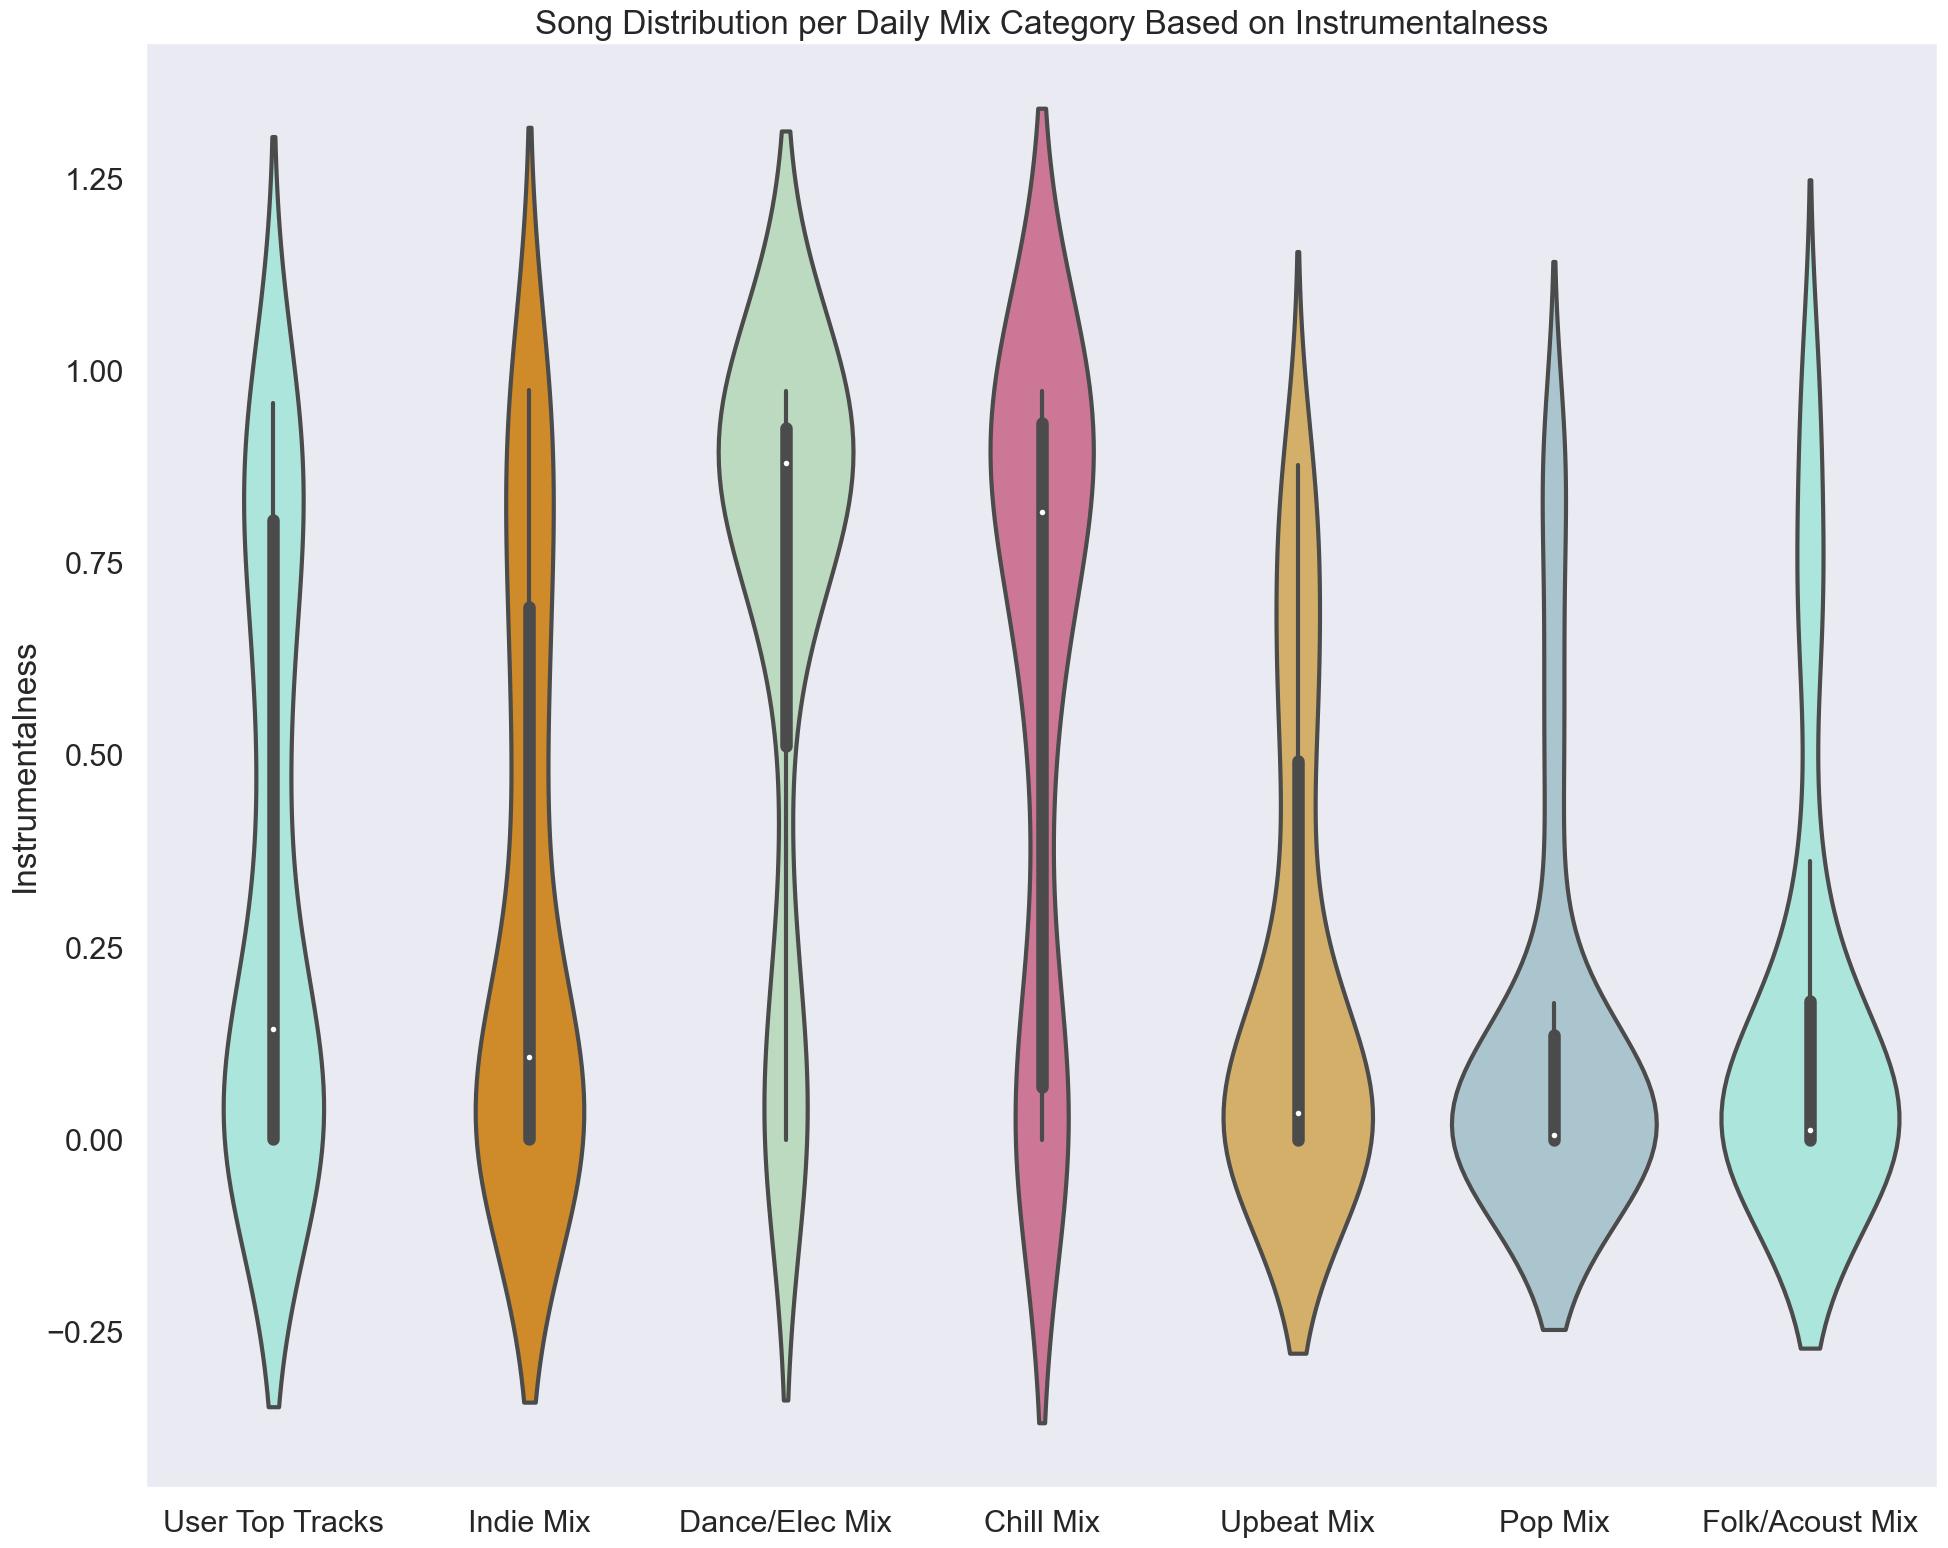

Instrumentalness
Min: 0.0
Max: 0.978


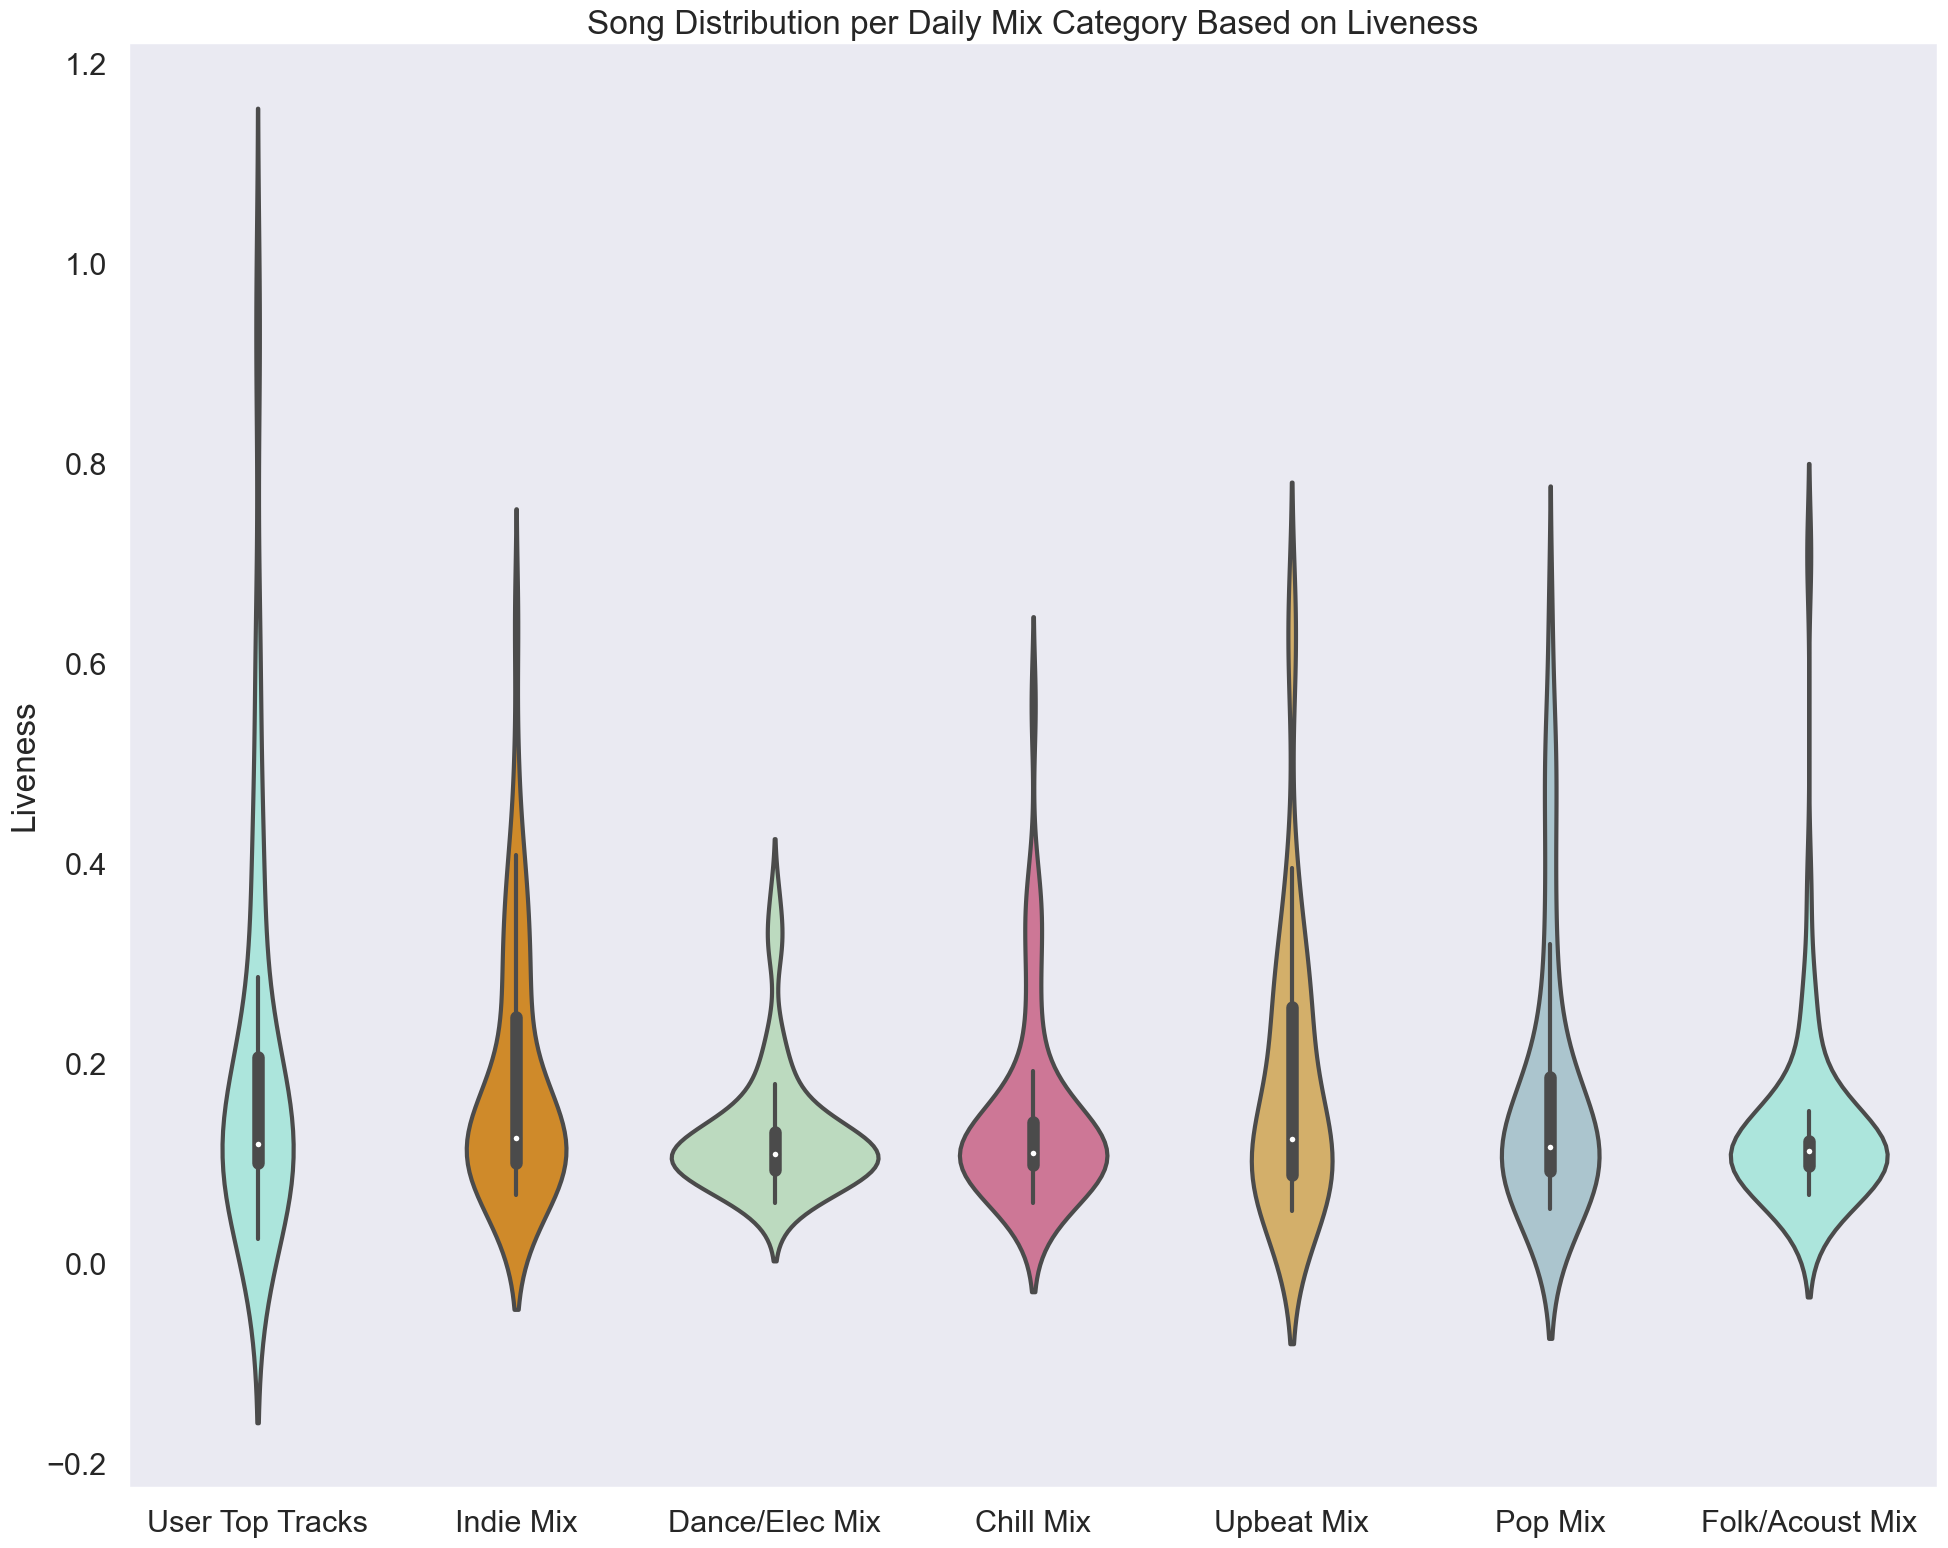

Liveness
Min: 0.025
Max: 0.972


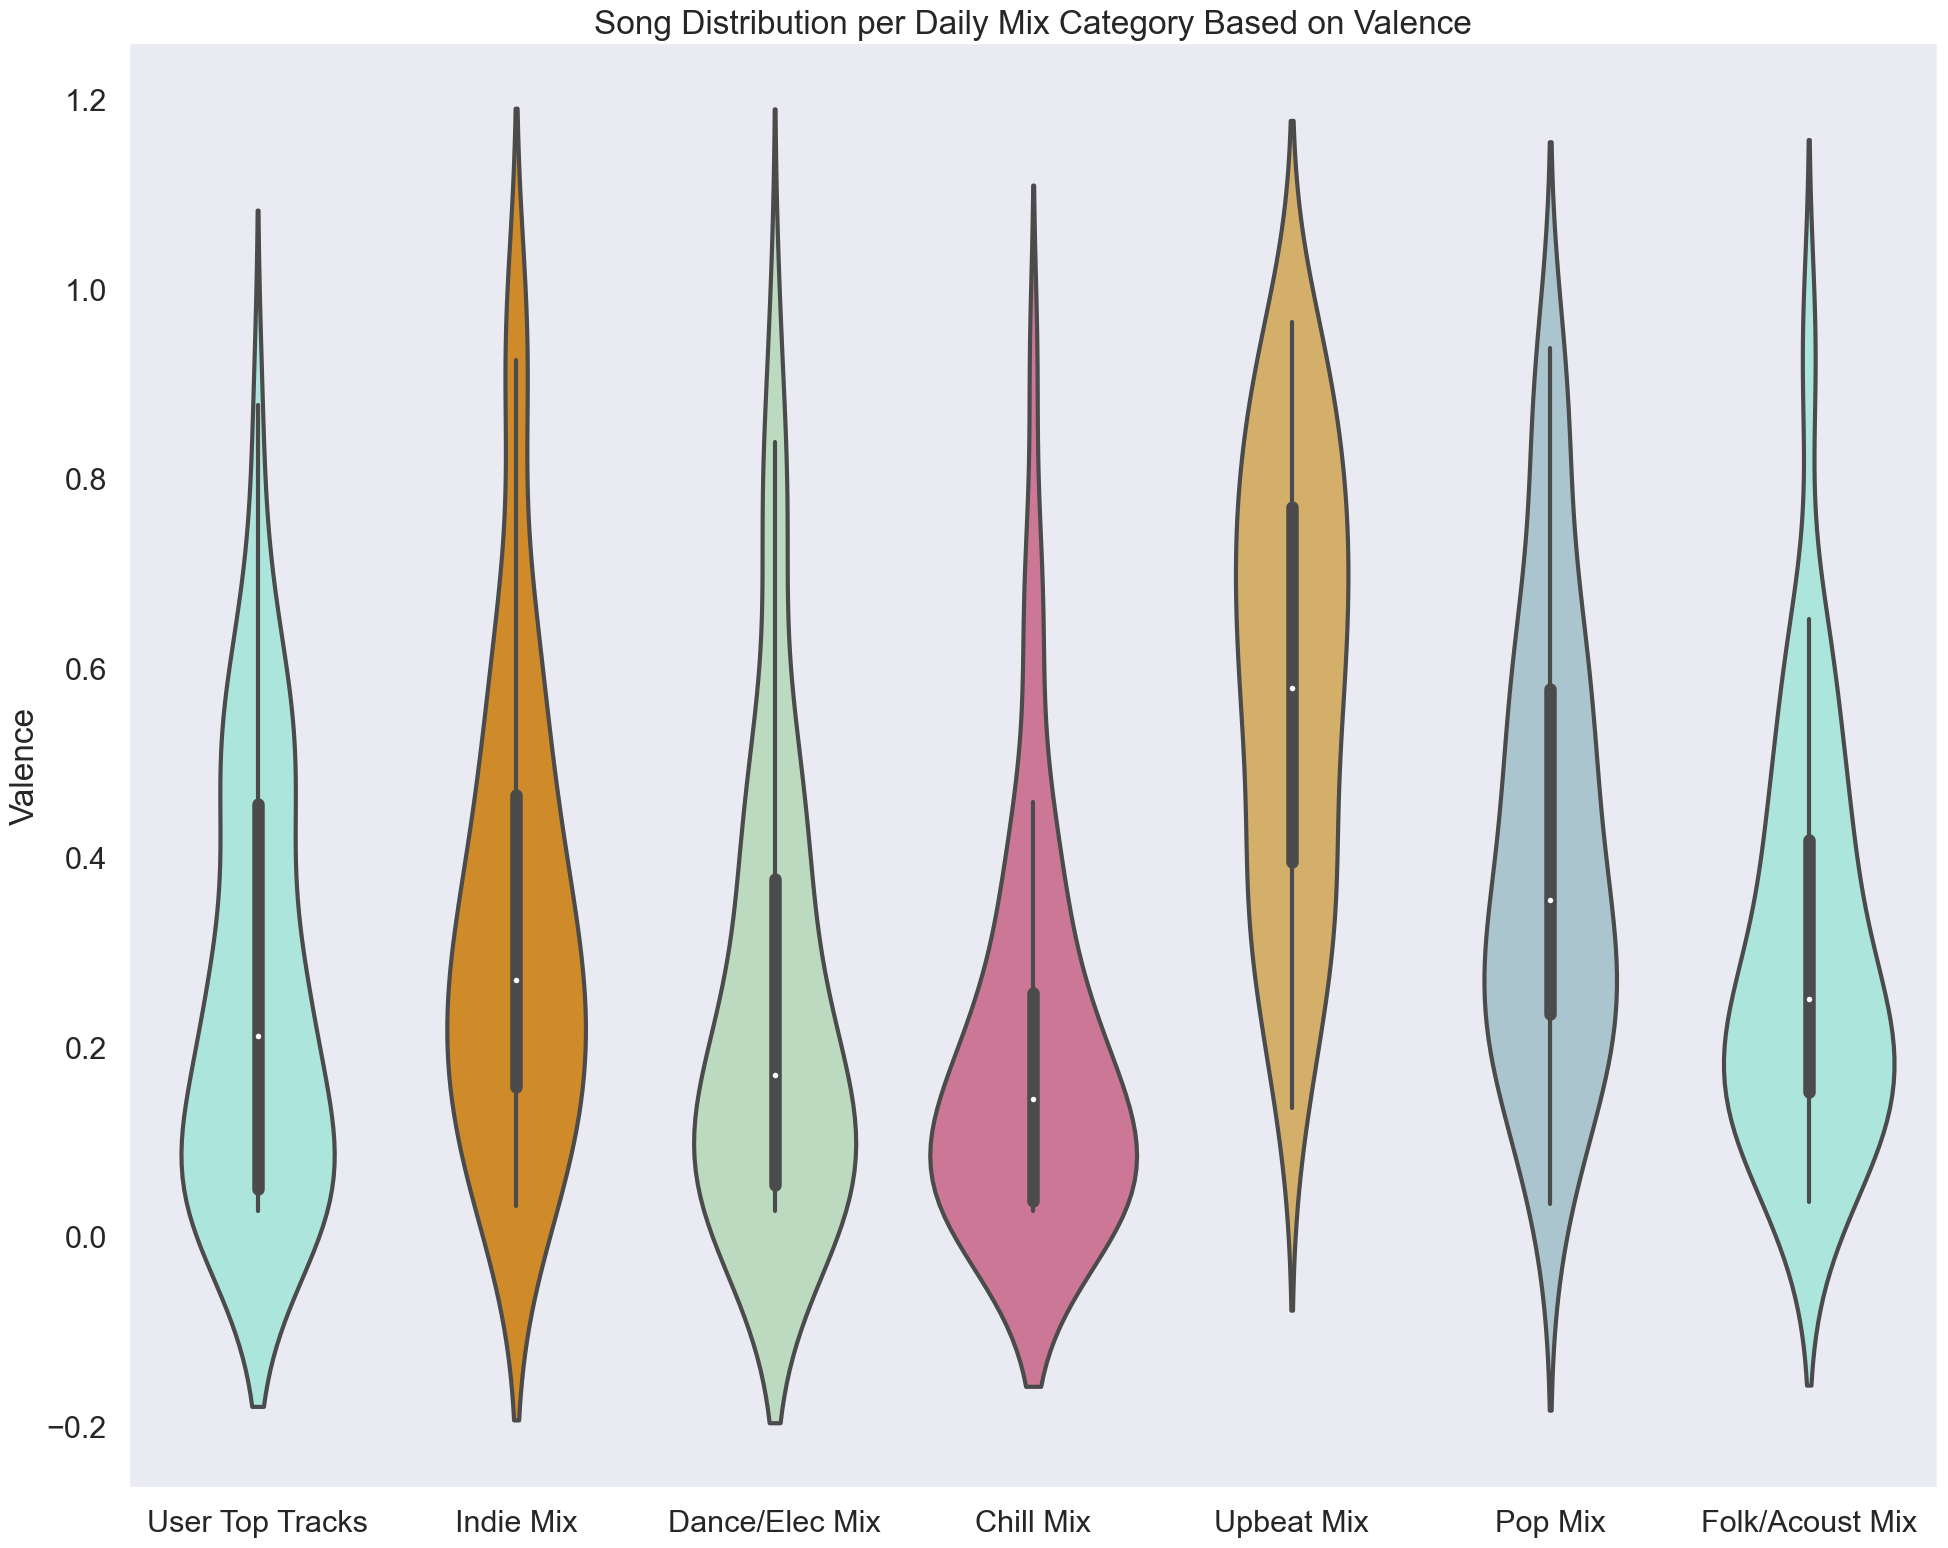

Valence
Min: 0.0273
Max: 0.968


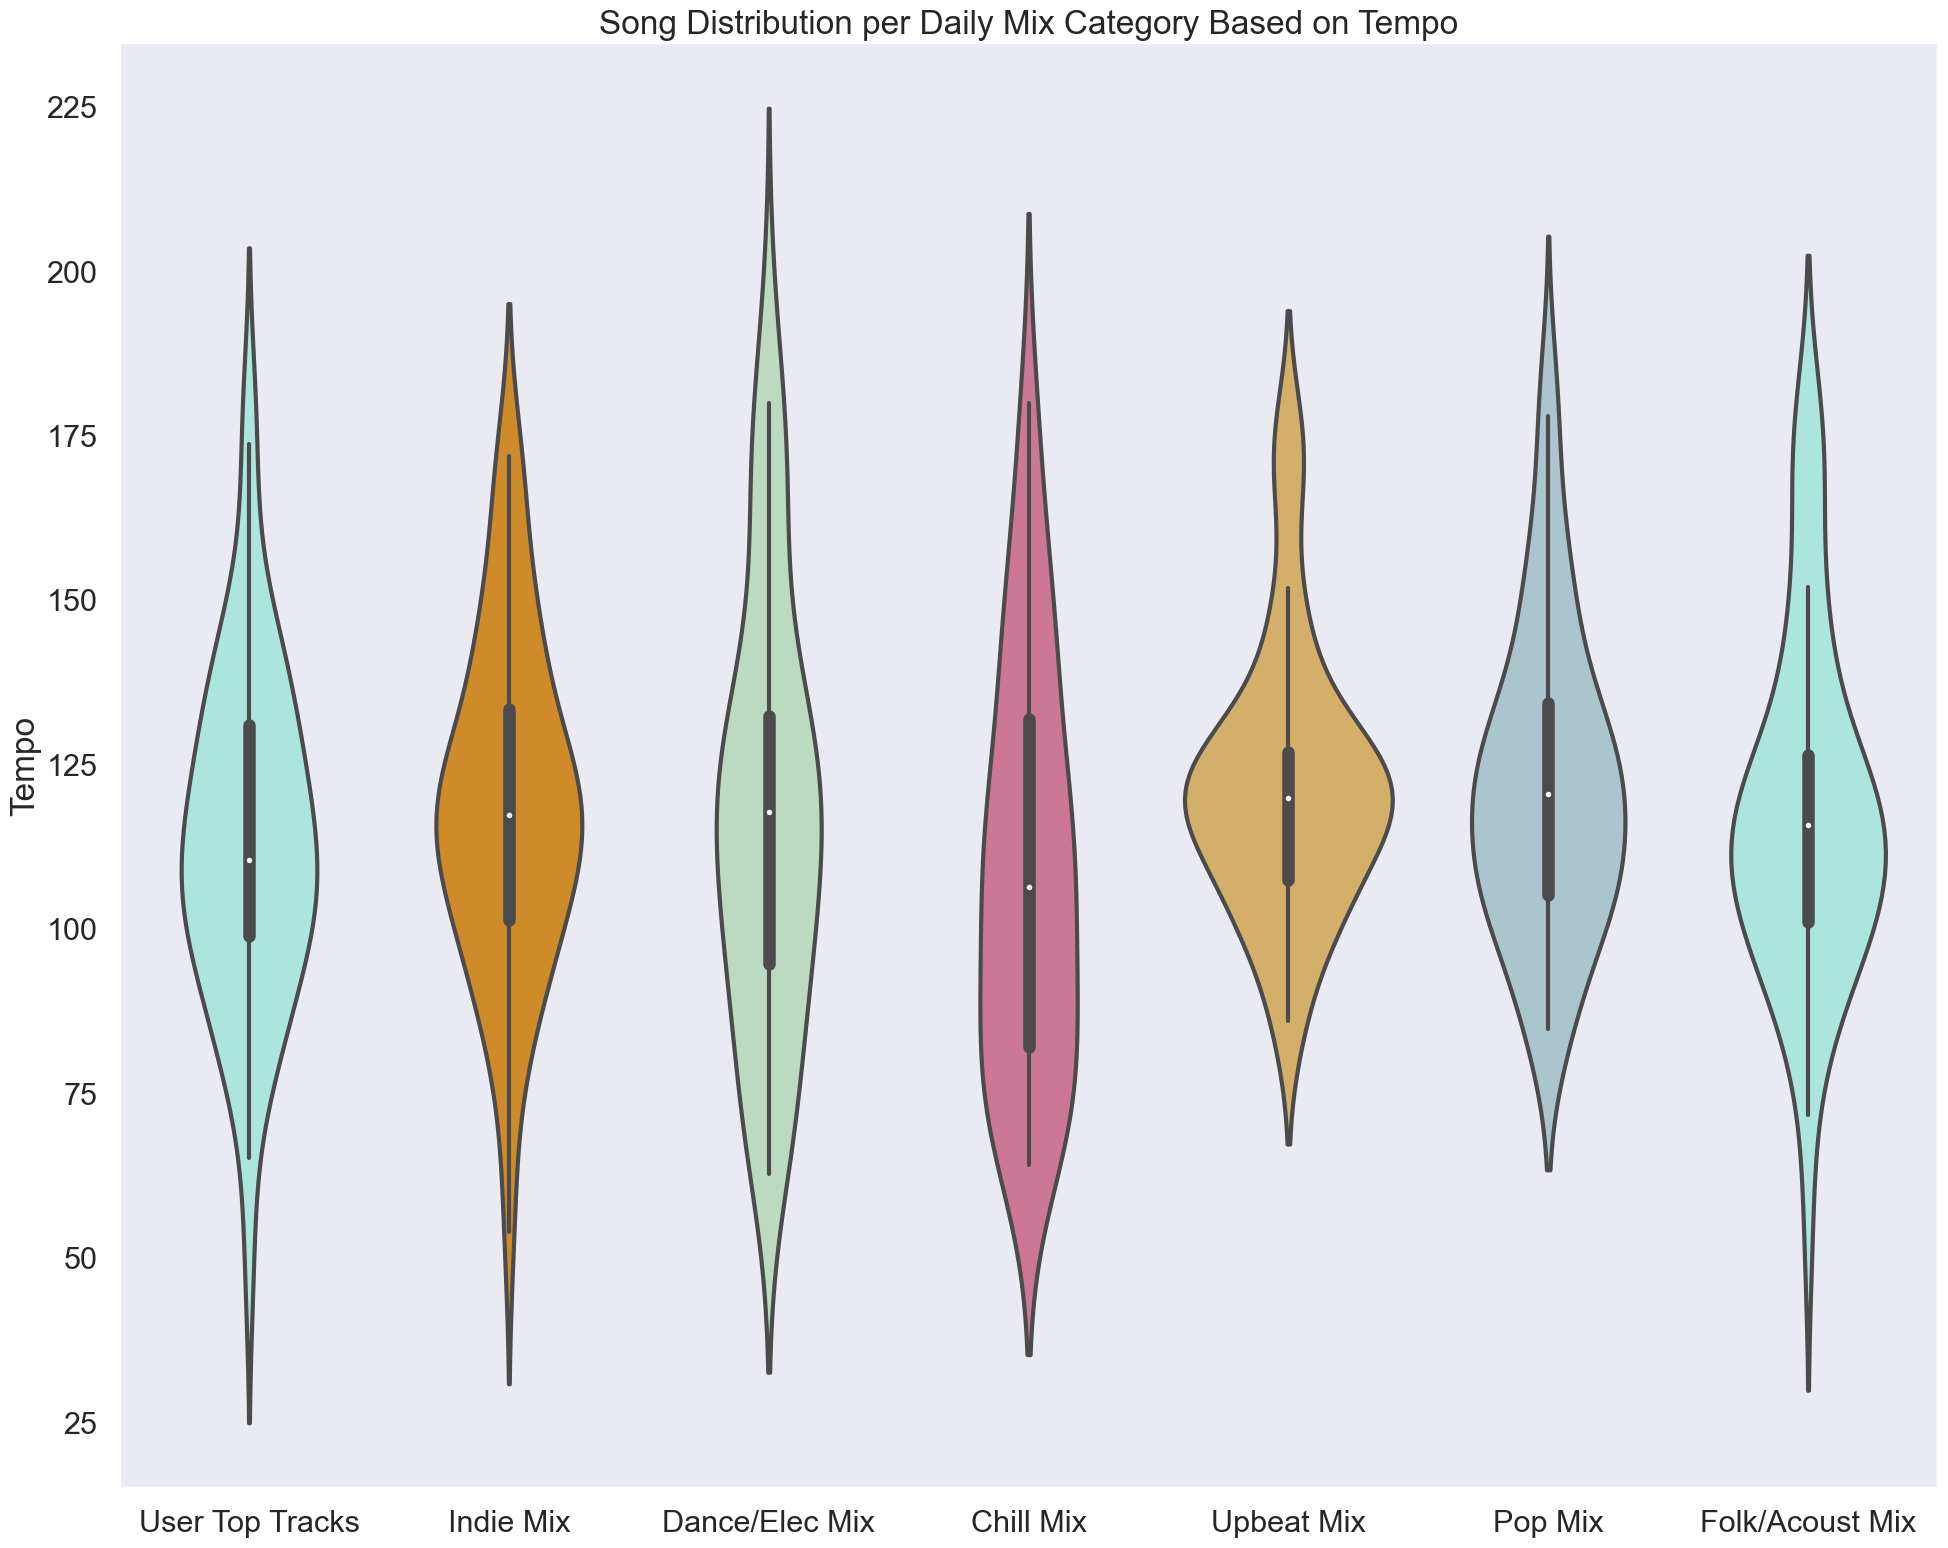

Tempo
Min: 48.637
Max: 194.768


In [105]:
# visualise data in violin plots

cols = spotify_df.loc[:,'danceability':'tempo'].columns.to_list()
colors = ['#a3eee3', '#ea8e0f', '#b7dfbb', '#db6992', '#e4b459', '#a5c8d4']

for col in cols:
    fig, ax = plt.subplots(figsize=(20, 16))
    ax = sns.violinplot(x='source', y=col, data=spotify_df, palette=colors)
    plt.title(f'Song Distribution per Daily Mix Category Based on {col.title()}')
    plt.ylabel(col.title())
    plt.xlabel(None)
    plt.tight_layout()
    plt.show()
    print('{}\nMin: {}\nMax: {}'.format(col.title(), min(spotify_df[col]), max(spotify_df[col])))

In [106]:
#scipy.stats.zscore(df)

#scipy.stats.norm.sf(abs("zscore"))
#find p-value for two-tailed test
#scipy.stats.norm.sf(abs(1.24))*2

#scipy.stats.pearsonr(x, y)

scipy.stats.ttest_ind(top_features_df['instrumentalness'], pop_mix['instrumentalness'])

TtestResult(statistic=3.212993305495501, pvalue=0.0017782032302057248, df=98.0)

In [107]:
# ANOVA test to compare select features, manually selected by me, across all data sets

anova_dance, anova_dance_p = scipy.stats.f_oneway(top_features_df['danceability'], indie_mix['danceability'], dance_electronic_mix['danceability'], chill_mix['danceability'], \
                        upbeat_mix['danceability'], pop_mix['danceability'], folk_acoustic_mix['danceability'])

anova_energy, anova_energy_p = scipy.stats.f_oneway(top_features_df['energy'], indie_mix['energy'], dance_electronic_mix['energy'], chill_mix['energy'], \
                        upbeat_mix['energy'], pop_mix['energy'], folk_acoustic_mix['energy'])

anova_acoustic, anova_acoustic_p = scipy.stats.f_oneway(top_features_df['acousticness'], indie_mix['acousticness'], dance_electronic_mix['acousticness'], chill_mix['acousticness'], \
                        upbeat_mix['acousticness'], pop_mix['acousticness'], folk_acoustic_mix['acousticness'])

d = {"ANOVA score":[anova_dance,anova_energy,anova_acoustic], "P Value":[anova_dance_p,anova_energy_p,anova_acoustic_p]}
anova_index = ["Danceability", "Energy", "Acousticness"]
anova_df = pd.DataFrame(data=d, index=anova_index)
anova_df

# The z score is very high, but the p value shows that the groups were not randomly selected

,ANOVA score,P Value
Danceability,18.742349,7.164144e-19
Energy,25.618107,3.881353e-25
Acousticness,24.634061,2.860535e-24


In [108]:
# Confirm p value scores and display conclusion

anova_alpha = 0.05

for index, p in anova_df["P Value"].items():
    if p <= anova_alpha:
        print(f"The P Value for the ANOVA test on {index} is below 0.05, which is statiscially significant.")
        print("This suggests that this data is most likely not randomly selected, but is selected based on user preference")
        print()
    else:
        print(f"The P Value for the ANOVA test on {index} is above 0.05, which is not statiscially significant.")
        print("This suggests that this data is most likely randomly selected, and not selected based on user preference")
        print()

The P Value for the ANOVA test on Danceability is below 0.05, which is statiscially significant.
This means we can conclude that this data is most likely not randomly selected, but is selected based on user preference

The P Value for the ANOVA test on Energy is below 0.05, which is statiscially significant.
This means we can conclude that this data is most likely not randomly selected, but is selected based on user preference

The P Value for the ANOVA test on Acousticness is below 0.05, which is statiscially significant.
This means we can conclude that this data is most likely not randomly selected, but is selected based on user preference



In [109]:
# T test on select data sets, manually selected by me, for the same select features

t_indie_dance, t_indie_dance_p = scipy.stats.ttest_ind(top_features_df['danceability'], indie_mix['danceability'])
t_indie_energy, t_indie_energy_p = scipy.stats.ttest_ind(top_features_df['energy'], indie_mix['energy'])
t_indie_acoustic, t_indie_acoustic_p = scipy.stats.ttest_ind(top_features_df['acousticness'], indie_mix['acousticness'])

t_upbeat_dance, t_upbeat_dance_p = scipy.stats.ttest_ind(top_features_df['danceability'], upbeat_mix['danceability'])
t_upbeat_energy, t_upbeat_energy_p = scipy.stats.ttest_ind(top_features_df['energy'], upbeat_mix['energy'])
t_upbeat_acoustic, t_upbeat_acoustic_p = scipy.stats.ttest_ind(top_features_df['acousticness'], upbeat_mix['acousticness'])

d = {"T Score":[t_indie_dance, t_indie_energy, t_indie_acoustic, t_upbeat_dance, t_upbeat_energy, t_upbeat_acoustic], \
     "P Value":[t_indie_dance_p, t_indie_energy_p, t_indie_acoustic_p, t_upbeat_dance_p, t_upbeat_energy_p, t_upbeat_acoustic_p]}
t_index = ["Indie Danceability", "Indie Energy", "Indie Acousticness", "Upbeat Danceability", "Upbeat Energy", "Upbeat Acousticness"]

t_df = pd.DataFrame(data=d, index=t_index)
t_df

# The T scores for the Indie category are much lower on average than the Upbeat category
# Yet for a small T score, the P Value can be high, and for a larger T score, the P Value may be quite low

,T Score,P Value
Indie Danceability,-2.569006,1.170685e-02
Indie Energy,-1.160866,2.485164e-01
Indie Acousticness,-0.863042,3.902213e-01
Upbeat Danceability,-6.909196,4.945704e-10
Upbeat Energy,-5.896637,5.282023e-08
Upbeat Acousticness,3.686397,3.731251e-04


In [110]:
# Confirm p value scores and display conclusion

t_alpha = 0.05

for index, p in t_df["P Value"].items():
    if p <= t_alpha:
        print(f"The P Value for the T Test on {index} is below 0.05, which is statiscially significant.")
        print("This suggests that this data is most likely not randomly selected, but is selected based on user preference")
        print()
    elif p > t_alpha:
        print(f"The P Value for the T Test test on {index} is above 0.05, which is not statiscially significant.")
        print("This suggests that this data is most likely randomly selected, and not selected based on user preference")
        print()

The P Value for the T Test on Indie Danceability is below 0.05, which is statiscially significant.
This means we can conclude that this data is most likely not randomly selected, but is selected based on user preference

The P Value for the T Test test on Indie Energy is above 0.05, which is not statiscially significant.
This means we can conclude that this data is most likely randomly selected, and not selected based on user preference

The P Value for the T Test test on Indie Acousticness is above 0.05, which is not statiscially significant.
This means we can conclude that this data is most likely randomly selected, and not selected based on user preference

The P Value for the T Test on Upbeat Danceability is below 0.05, which is statiscially significant.
This means we can conclude that this data is most likely not randomly selected, but is selected based on user preference

The P Value for the T Test on Upbeat Energy is below 0.05, which is statiscially significant.
This means we c

In [111]:

scipy.stats.norm.sf(abs(top_features_df['instrumentalness'].mean()))*2
scipy.stats.pearsonr(top_features_df['instrumentalness'], pop_mix['instrumentalness'])
scipy.stats.ttest_ind(top_features_df['instrumentalness'], pop_mix['instrumentalness'])


TtestResult(statistic=3.212993305495501, pvalue=0.0017782032302057248, df=98.0)

In [112]:
scipy.stats.zscore(top_features_df.drop(columns='source'))


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.084301,0.864269,1.366148,0.847357,0.561951,-0.560696,-0.862799,-0.827073,-0.645466,-0.066127,1.035233,0.496375
1,-0.787046,-1.236550,-1.062559,-0.105706,0.561951,0.296079,0.092248,-0.626398,-0.523443,-1.019509,-1.039789,-1.127015
2,-0.060398,-0.433619,0.151794,-0.140574,0.561951,-0.806491,0.565569,-0.858478,0.937819,-0.774892,-0.275634,-0.485588
3,0.063897,-0.987238,-0.758971,-0.836865,0.561951,1.356512,-0.395591,1.319136,-0.287432,-0.222934,-0.660370,0.717188
4,-0.973489,-1.671012,1.973324,-0.675041,0.561951,-0.033990,-0.809384,1.601251,-0.402927,-0.983668,-0.054987,-1.191226
5,-0.041276,0.860602,0.455383,0.753303,0.561951,-0.687105,-0.860279,-0.948242,-0.463185,-0.984564,-0.335790,0.648009
6,-1.355936,1.252902,1.973324,1.065686,-1.779513,0.766602,-0.863040,-0.559861,0.274979,-0.777580,-0.581335,0.478479
7,0.551517,1.366558,0.455383,1.145972,0.561951,0.871943,-0.846088,-0.948326,-0.527461,-0.093009,-0.298070,-0.070878
8,0.809668,0.149330,1.366148,-0.938429,0.561951,-0.111240,-0.831162,-0.948106,-0.653501,1.466094,-0.532320,0.361499
9,2.124328,-0.514279,-0.758971,0.178782,0.561951,-0.511536,-0.415918,-0.948436,-0.407948,1.058397,0.168631,-0.449347


In [113]:
endpoint = "me/top/tracks"
url = ''.join([base_url,endpoint])
response = requests.get(url,headers=headers)
response.json()


{'error': {'status': 502, 'message': ''}}

In [114]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id = playlist_ids[0]
playlist_tracks_data = sp.playlist_tracks(playlist_id)

playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

    #go through the dictionary to extract the data
for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

    #create a dataframe
features = sp.audio_features(playlist_tracks_id)
features_df = pd.DataFrame(data=features, columns=features[0].keys())
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                            'danceability', 'energy', 'key', 'loudness',
                            'mode', 'acousticness', 'instrumentalness',
                            'liveness', 'valence', 'tempo',
                            'duration_ms', 'time_signature']]

features_df.head()

NameError: name 'playlist_ids' is not defined

In [ ]:
# visualise data

cols = spotify_df.loc[:,'danceability':'tempo'].columns.to_list()
colors = ['#a3eee3', '#ea8e0f', '#b7dfbb', '#db6992', '#e4b459', '#a5c8d4']

for col in cols:
    fig, ax = plt.subplots(figsize=(20, 16))
    ax = sns.violinplot(x='source', y=col, data=spotify_df, palette=colors)
    plt.title(f'Song Distribution per Daily Mix Category Based on {col.title()}')
    plt.ylabel(col.title())
    plt.xlabel(None)
    plt.tight_layout()
    plt.show()
    print('{}\nMin: {}\nMax: {}'.format(col.title(), min(spotify_df[col]), max(spotify_df[col])))

In [ ]:
heatmap = pop_mix.drop(['key','mode','source'], axis=1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(heatmap, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='cividis', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

In [ ]:
heatmap = top_features_df.drop(['key','mode','source'], axis=1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(heatmap, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='cividis', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)                               